## Assessment 2: Exploratory Data Analysis and Data Cleansing

Student Name: Girish D Bhatta<br >
Student ID: 29270863<br >
Date: 04/10/2018<br >

Version: 1.0<br >

Environment: Python 3.6 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:

* re (for regular expression, included in Anaconda Python 3.6)
* numpy (to perform array related operations on the columns of the dataframe)
* sklearn (To build Linear Regression model on the Data)
* matplotbil (To build visulaizations and plots)
* datetime (to perfrom Datetime Operations with date objects)
* seaborn (to plot colorful and intuitive plots)
* pandas(to extract and perform data processing of csv files and other formats)


## Import Libraries and Dependencies

In [1]:
# importing all the necessary packages and librairies to perform several tasks

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as py
from math import sin, cos, sqrt, atan2, radians
import seaborn
from datetime import timedelta
from datetime import datetime
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
#Reading the csv File
drone_data = pd.read_csv("29270863.csv")
drone_data.head(10)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1849655011,1.0,0.0,9.646,16.0,3.0,-37.803501,146.358239,-37.893111,144.910002,127.689,2018-01-23,14:40:13,118.50,16:38:43,101.33
1,ID1657730481,3.0,0.0,38.017,30.0,12.0,-38.728765,147.590521,-38.660760,146.341281,108.799,2018-03-26,22:31:42,95.24,0:06:56,183.76
2,ID5703224111,1.0,1.0,29.277,33.0,47.0,-37.622992,145.669696,-38.037479,145.633167,46.251,2018-01-23,10:29:11,47.68,11:16:51,110.15
3,ID1442322586,1.0,0.0,32.770,30.0,15.0,-38.529391,147.636260,-37.104551,143.863474,367.692,2018-07-28,09:09:43,327.20,14:36:54,100.23
4,ID1830381771,1.0,0.0,13.591,16.0,16.0,-37.640116,146.526228,-37.546541,146.290335,23.268,2018-05-07,21:49:01,27.70,22:16:42,110.82
5,ID1451563598,1.0,0.0,8.602,39.0,2.0,-38.377258,143.214333,-37.485639,147.447715,384.677,2018-02-12,02:18:09,341.97,8:00:07,140.25
6,ID1143543691,1.0,0.0,17.896,58.0,2.0,-37.014279,146.092692,-37.420573,147.726453,151.723,2018-02-26,19:52:48,139.40,22:12:12,104.64
7,ID1600250538,1.0,0.0,32.409,43.0,51.0,-38.660351,145.488943,-38.859219,147.821705,203.691,2018-07-01,23:11:47,184.59,2:16:22,125.78
8,ID5649368894,1.0,1.0,38.609,42.0,43.0,-38.753654,143.918203,-38.692264,145.557649,142.544,2018-01-27,06:13:45,131.41,8:25:09,122.38
9,ID5938541782,1.0,1.0,37.750,1.0,23.0,-37.169106,148.284461,-37.437335,147.224942,98.452,2018-05-16,08:05:41,93.07,9:38:45,113.72


Now that we have imported the dataSet, we start performing prelimiary analysis on the data.

In [3]:
#to show the statistical summary of the data
drone_data.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,35726.000000,35716.000000,35736.000000,35726.000000,35726.000000,35736.000000,35736.000000,35736.000000,35736.000000,35736.000000,35696.000000,35706.000000
mean,1.696048,0.298886,25.773756,30.044114,29.855875,-37.720568,145.390215,-37.724969,145.379563,213.862846,187.818979,148.459847
std,0.779485,0.457776,12.106209,17.027069,16.919892,1.953916,7.087976,1.952439,7.074059,109.892559,92.975437,61.224802
min,1.000000,0.000000,5.001000,1.000000,1.000000,-39.006791,-148.420411,-39.006797,-147.926757,0.353000,7.760000,66.950000
25%,1.000000,0.000000,15.321000,15.000000,15.000000,-38.504132,144.124541,-38.499426,144.115535,130.067750,116.900000,119.202500
50%,1.000000,0.000000,25.722500,30.000000,30.000000,-37.747811,145.542842,-37.749603,145.510400,203.949000,179.285000,141.750000
75%,2.000000,1.000000,36.007000,45.000000,44.000000,-37.035149,146.932930,-37.058510,146.925041,285.032250,248.602500,167.057500
max,3.000000,1.000000,55.991000,59.000000,59.000000,38.983426,148.450760,38.880707,148.450760,553.955000,489.160000,1166.170000


The describe function provides a good means to have a look at the data and arrive at certain insights. For example we can see the Drone Type, Post Type are discrete numerical variables whereas, Package Weight, Journey Distance, and Travel Time are continuous variables. 

In [4]:
# ascertain the data information, in terms of data types of all the features in the datset
drone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35736 entries, 0 to 35735
Data columns (total 16 columns):
Id                       35712 non-null object
Drone Type               35726 non-null float64
Post Type                35716 non-null float64
Package Weight           35736 non-null float64
Origin Region            35726 non-null float64
Destination Region       35726 non-null float64
Origin Latitude          35736 non-null float64
Origin Longitude         35736 non-null float64
Destination Latitude     35736 non-null float64
Destination Longitude    35736 non-null float64
Journey Distance         35736 non-null float64
Departure Date           35736 non-null object
Departure Time           35736 non-null object
Travel Time              35696 non-null float64
Delivery Time            35736 non-null object
Delivery Fare            35706 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.4+ MB


## Prelimiary Analysis

### 1. Univariate Analysis

In the proceeding section, we will go through the characteristics of the data and pattens on a column to column basis and perform both graphical and non-graphical analysis wherever necessary. 

#### 1.1 Id

For the Id column, we will perform the Exploratory analysis in terms finding number of null values, duplicates and the data format.

In [5]:
#datatype of Id
drone_data["Id"].dtype

dtype('O')

We can observe that Id type is of Object

In [6]:
#how many duplicate ID's are present
id_count = pd.DataFrame(drone_data["Id"].value_counts())
id_count = id_count.reset_index()
id_list = list(id_count["index"][id_count["Id"] > 1])
len(id_list)

36

We can observe that there are 36 duplicates in the Id column, But are there so many duplicates ? Perhaps we have to look at the number of nulls in the column to ascertian the number of  duplicates.

In [7]:
#count of null values in ID
drone_data["Id"].isna().sum()

24

There are 24 null values in the column. Therefore 36 duplicates is contained of 24 nulls and 12 duplicate values.

#### 1.2 Drone Type

Drone Type, a column to indicate the category,a drone belongs to. We perform both graphical and non-grpahical analysis on the Drone type data.

In [8]:
#statistical summary for drone type
drone_data['Drone Type'].describe()

count    35726.000000
mean         1.696048
std          0.779485
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: Drone Type, dtype: float64

We observe that Drone type is a categorical variable with drone types varying from drone type 1 to 3. We therefore perform graphical analysis on this column

In [9]:
#value counts for drone type
drone_data["Drone Type"].value_counts()

1.0    17933
2.0    10719
3.0     7074
Name: Drone Type, dtype: int64

 We can observe the distribution of Drone Types across the Data Set. With Drone Type 1 being the most appearing Drone Type and Drone Type 3 being the least appearing.

In [10]:
#count of null values in Drone Type
drone_data["Drone Type"].isna().sum()

10

We can see that there are a total of 10 null values in the Drone Type Column. These missing values have to be imputed with some Drone Type value based on some Analsyis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027137551DD8>]],
      dtype=object)

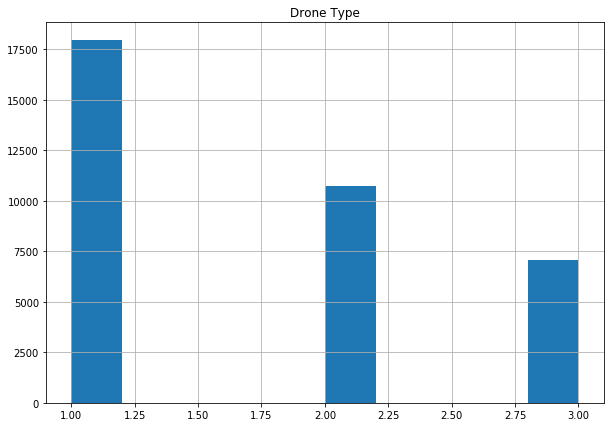

In [11]:
# plot the histogram of Drone Type
drone_data.hist("Drone Type",figsize=(10,7))

#### 1.3 Post Type

Post Type indicates the Category of Post the Drone was sent by. 0 indicating normal delivery mode and 1 indicating express mode.We perform both graphical and non-graphical analysis on post Type

In [12]:
#value counts for Post Type
drone_data['Post Type'].value_counts()

0.0    25041
1.0    10675
Name: Post Type, dtype: int64

WE can see that there are 2 Post Types. namely : Post Type 0 and Post Type 1. We can also observe that Post type 0 has more occurence than Post Type1. The same can be visualized graphically as well. 

In [13]:
#count of null values in Post Type
drone_data["Post Type"].isna().sum()

20

We see that there are 20 Post Type missing values. We need to establish a correaltion with one or more number of columns and then impute the missing values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271379EFAC8>]],
      dtype=object)

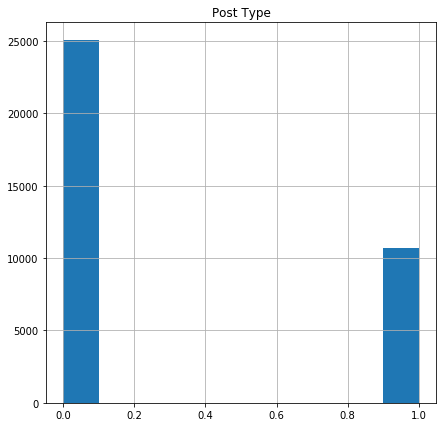

In [14]:
#histogram plot of Post Type
drone_data.hist("Post Type",figsize=(7,7))

The graphical analysis suggests that there are more Post Type of Normal/Ordinary Types as compared to less than half of that of Post Type 1 which indicates express.

#### 1.4 Package Weight

The package weights are continuous as opposed to the other columns where we performed our analysis on, therefore we need to perform a more comprehensive initial data analysis on this. The describes that the weight of the package that was carried from one place to another.

In [15]:
#statistical summary of Package WEight
drone_data['Package Weight'].describe()

count    35736.000000
mean        25.773756
std         12.106209
min          5.001000
25%         15.321000
50%         25.722500
75%         36.007000
max         55.991000
Name: Package Weight, dtype: float64

We can observe that there are a totol of 35736 instances of Package weight, with the minimum package weight being 5.001 Kg and and the maximum being 55.99 kg. We consider the weights to be in "Kilogram" mertic as gauging weights in any other metric sounds counter-intuitive and does'nt make sense.

In [16]:
#count of missing values in Package weight
drone_data['Package Weight'].isna().sum()

0

There are no missing values in Package Weight column. However we cannot establish the authenticity of these values at this poit of time. We can analyze that only after performing in depth analaysis.

The same can be visualized graphically as well. Since there are a lot of records we first set the range and then analyse.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271378C7198>]],
      dtype=object)

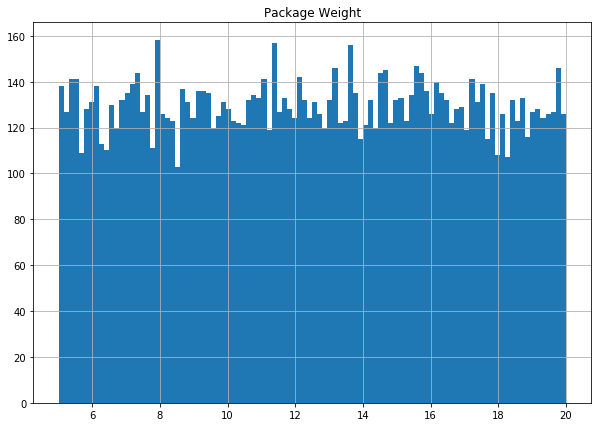

In [17]:
#plot for package weights between 5 and 20
drone_data[(drone_data["Package Weight"] > 5.0) & (drone_data["Package Weight"] < 20.0)].hist("Package Weight",bins = 100,figsize=(10,7))

We can observe that for package weights in the range 5 to 20 we see maximum number of packages in the range of 6 to 8, 10 to 12 and 12 to 14 and the minimum records with the weight in the range of 8 to 10. therefore , it is safe to say that the weights are unorderly distributed in this range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027137930908>]],
      dtype=object)

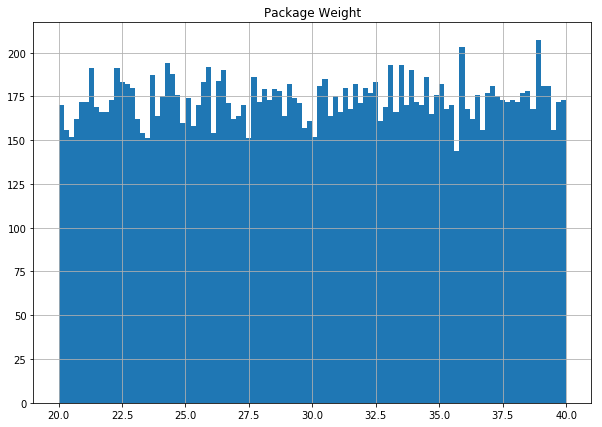

In [18]:
#plot for package weights between 20 and 40
drone_data[(drone_data["Package Weight"] > 20) & (drone_data["Package Weight"] < 40)].hist("Package Weight",bins = 100,figsize=(10,7))

We can see that the maximum packages appear in the range of 37.5 to 40 kgs and the least appearing in 35 to 37.5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027137C10F60>]],
      dtype=object)

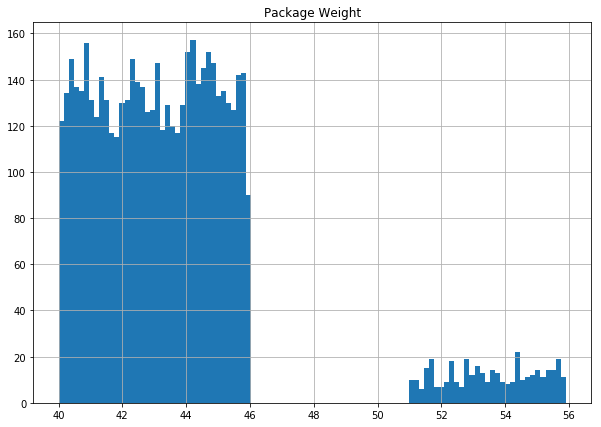

In [19]:
#plot for package weights between 40 and above
drone_data[(drone_data["Package Weight"] > 40) & (drone_data["Package Weight"] < drone_data["Package Weight"].max())].hist("Package Weight",bins = 100,figsize=(10,7))

This plot looks rather intereseting. We can see that there are no packages in the range of 46 to 51. and there are very few packages with weight more than 51. Perhaps , the packages with weight more than 50 have an influence on some other enitity ? we need to perform further analysis to arrive at that inference.

#### 1.5 Origin Region

Origin region has discrete values, we thereofre perform both graphical and non-graphical data analysis.

In [20]:
# unique region in Origin Region
drone_data["Origin Region"].unique()

array([16., 30., 33., 39., 58., 43., 42.,  1., 50.,  9., 22.,  3., 20.,
        7., 47.,  5., 24.,  8.,  2., 38., nan, 45., 27., 56., 11., 23.,
       53., 18., 55., 14., 51., 37., 21., 28., 17., 41., 12., 13.,  6.,
        4., 31., 49., 34., 29., 52., 36., 46., 40., 26., 44., 57., 25.,
       15., 35., 19., 59., 32., 54., 10., 48.])

In [21]:
#maximum region and minimum region in origin region
print("The region with highest region id is  : ",drone_data["Origin Region"].max())
print("The region with lowest region id is : ",drone_data["Origin Region"].min())

The region with highest region id is  :  59.0
The region with lowest region id is :  1.0


There are in total 59 regions with regions numbered from 1 to 59. However there are null as well. Let us look at the distribution of the origin regions as well.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027137DFBF60>]],
      dtype=object)

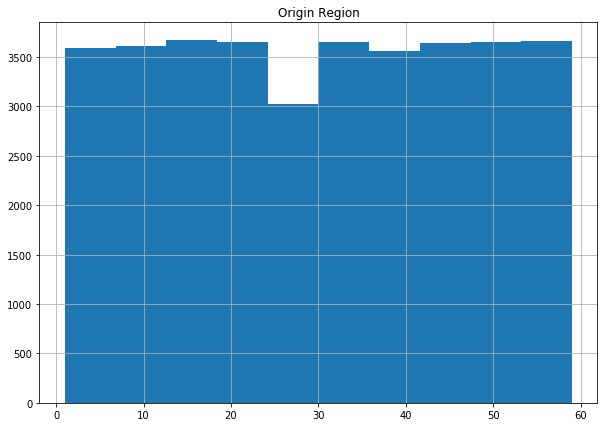

In [22]:
#histogram for Origin Region
drone_data.hist("Origin Region",figsize=(10,7))

As we can observe that the distribution cannot be identified, finding the regions with maximum presence and minimum presence will give us a rough idea about the distribution.

In [23]:
#finding regions with minimum drone presence
origin_info = drone_data["Origin Region"].value_counts().reset_index()
origin_info[origin_info["Origin Region"] == origin_info["Origin Region"].min()]

,index,Origin Region
58,46.0,545


The region with minimum drones taking off is 46 . Similarly we can find the region with maximum drones originating from.

In [24]:
#finding regions wiht maximum drone presence
origin_info[origin_info["Origin Region"] == origin_info["Origin Region"].max()]

,index,Origin Region
0,25.0,673


The origin region with highest drones flying from is region 25.

In [25]:
#count of null values in Origin REgion
drone_data["Origin Region"].isna().sum()

10

Also we can observe that there are 10 null values in the origin region.

#### 1.6 Destination Region

Similarly, we can analyze the Destination region . We perform both graphical and non graphical data analysis.

In [26]:
#priting the highest and lowest destiantion region numbers
print("The region with highest region id is  : ",drone_data["Destination Region"].max())
print("The region with lowest region id is : ",drone_data["Destination Region"].min())

The region with highest region id is  :  59.0
The region with lowest region id is :  1.0


There are same regions as that of origin region. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027137E696A0>]],
      dtype=object)

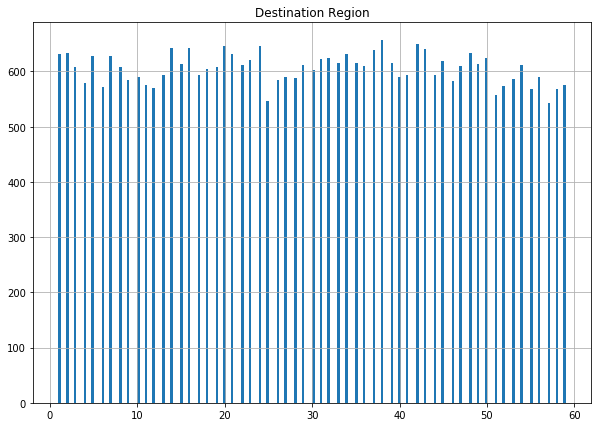

In [27]:
#histogram for destination region
drone_data.hist("Destination Region",bins=200,figsize=(10,7))

In [28]:
#finding the destination with minimum drone presence
dest_info = drone_data["Destination Region"].value_counts().reset_index()
dest_info[dest_info["Destination Region"] == dest_info["Destination Region"].min()]

,index,Destination Region
58,57.0,543


The Destination region which has least drones flying into is region 57.

In [29]:
#finding the region with maximum drone presence
dest_info[dest_info["Destination Region"] == dest_info["Destination Region"].max()]

,index,Destination Region
0,38.0,656


We can observe that similar to Origin Region. Destination Region also has the same number of missing values

#### 1.7 Origin Latitude and Longitude

When it comes to latitude and longitude, there is every chance of syntactical errors in these columns. There are a certain rules and boundries to specify A regions latitude and longitude. For instance the latitudes and longitudes should not be less than -90 and greater than 180 respectively. If there are records which have latitudes adn longitudes surpassing these boundries they have to be flagged and the corresponding latitude and longitude values have to be imputed with correct value.

In [30]:
#looking for extreme limits of latitude values
idx1 = (drone_data[(drone_data["Origin Latitude"]<-90) | (drone_data["Origin Latitude"]>90)].index.tolist())
drone_data.loc[idx1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


In [31]:
#looking for extreme limits of Longitude and Latitude
idx1 = (drone_data[(drone_data["Origin Longitude"]<-180) | (drone_data["Origin Longitude"]>180)].index.tolist())
drone_data.loc[idx1]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


we can observe that there are no latitude and longitude values that are exceeding the permissibile limit. however this is not a full proof indication of absence of incorrect values in the said columns. we have to dwell deep into these fields and establish a correlation among this and other columns to so that there are no syntactically wrong values with certainty.

In [32]:
print("Number of missing values in origin latitude is : ", drone_data["Origin Latitude"].isna().sum())
print("Number of missing values in origin longitude is : ",drone_data["Origin Longitude"].isna().sum())

Number of missing values in origin latitude is :  0
Number of missing values in origin longitude is :  0


We can observe that there are no missing values in Origin Latitiude and Longitude columns

#### 1.8 Destination Latitude and Longitude

The similar rules apply for Destination latitude and longitude as well.

In [33]:
#looking for extreme Latitude values 
idx2 = (drone_data[(drone_data["Destination Latitude"]<-90) | (drone_data["Destination Latitude"]>90)].index.tolist())
drone_data.loc[idx2]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


In [34]:
#looking for extreme Longitude values
idx2 = (drone_data[(drone_data["Destination Longitude"]<-180) | (drone_data["Destination Longitude"]>180)].index.tolist())
drone_data.loc[idx2]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare


We can observe that there are no values in Destination Latitude and longitude that are outside the permissible range. However, this doesnt guarantee that there is nothing wrong semantically or syntactically with the values of the Destination latitude and longitude. we have to dig deep further.

In [35]:
#finding the count of missing values
print("Number of missing values in origin latitude is : ", drone_data["Destination Latitude"].isna().sum())
print("Number of missing values in origin longitude is : ",drone_data["Destination Longitude"].isna().sum())

Number of missing values in origin latitude is :  0
Number of missing values in origin longitude is :  0


We can see that there are no missing values in the Destination Latitude and Longitude columns.

#### 1.9 Journey Distance

This column represents the distance travelled by the drone from the origin region to the destination region. we first perform some basic non-graphical analysis followed by some graphical analysis.

In [36]:
#finding maximum and minimum journey distances
print("The maximum journey distance is : ",drone_data["Journey Distance"].max())
print("The minimum journey distance is : ",drone_data['Journey Distance'].min())

The maximum journey distance is :  553.955
The minimum journey distance is :  0.353


We can see that the variation among the maximum and minimum jpurney distance is way too large, with minimum standing at 353 metres (we consider metres as a metric to measure the distance by taking the values in Travel Time into congisance) and maximum distance at 553.995 Kms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027139121438>]],
      dtype=object)

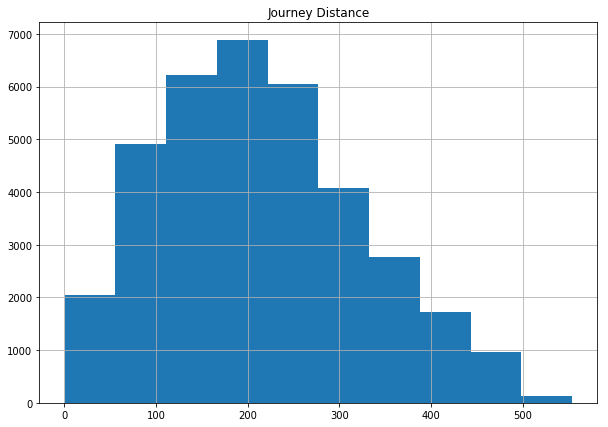

In [37]:
#plot for journey distance
drone_data.hist("Journey Distance",figsize=(10,7))

From the histogram plot of the journey distance distribution, we can see right/positive skewed data with maximum number of journey distance falling in the region of 100 to 200. however we see a falling trend from 300kms onwards. there are very few drone deliveries ranging more than 500 kms. the journies ranging more than 500 kms can be termed as long journies and that within 100 to 200 can be termed as moderate journies. Is there a correlation of journey distance with the post type or Drone type ? Maybe , Maybe not. we have to do further investigation.

From the above plot we can find the outliers as far as the distance is concerned.

In [38]:
#code to calculate the outlier count for journey distance
mean = drone_data["Journey Distance"].mean()
std = drone_data["Journey Distance"].std()
count = 0
for each in drone_data["Journey Distance"]:
    if each < mean-(3*std) or each > mean+(3*std):
        count +=1
print("Just by looking at the Distances by itself we can see there are a total of",count,"outliers")

Just by looking at the Distances by itself we can see there are a total of 8 outliers


WE can see that there are 8 outliers when considered the Distance by itself. However, we do not remove these records from the Dataframe. Reason being, that the distance could depend on Drone type, the Post Type or for that matter any other features of the column, and hence, getting rid of supposed outliers by just considering the univariate outliers would be incorrect.

#### 1.10 Departure Dates

This column captures the Departure date of the Drones which went out for packages to be delivered. We have to perform non-graphical analysis.

We can observe that the dates are in yyyy-mm-dd. But are all the dates in the same format? we have to perform further analysis. We can see that the dates is of type object. we have to convert it to date format. before we do that, we have to check for any missing values.

In [39]:
#count of null values
drone_data["Departure Date"].isna().sum()

0

Surprisingly there are no null values. However are all the values correct.? WE have to first convert the column to date type and proceed further.

In [40]:
#datatype of Departure date
drone_data["Departure Date"].dtype

dtype('O')

We can see that the Departure date is of type Object. We need to convert it to date type to perform further analysis.

Assuming the Dates are in proper format we first try to covert the dates which are in Object format to Date format. We enclose the conversion operation in a try except block. This ensures that in case the conversion, does'nt take place, the dates are not in proper format and hence we need to correct them.

In [41]:
#code to convert and date object to date and print message accordingly
try:
    drone_data["Departure Date"] = pd.to_datetime(drone_data["Departure Date"])
    print(success)
except:
    print("failure to convert to Date")


failure to convert to Date


We can see that the Try except block gave a Failure to convert to data message. we can conclude that our dates are not in the right format. What could be the Right format ?

In [42]:
#inspection of kind of values in Departure Date
drone_data["Departure Date"].head()

0    2018-01-23
1    2018-03-26
2    2018-01-23
3    2018-07-28
4    2018-05-07
Name: Departure Date, dtype: object

From the above output, we can see that the dates are in yyyy-mm-dd format. The fact that the datetime conversion didnt take place properly, it means either the same order of the date compenents doesnt exist or the dates have illigitamate date values. Therefore we identify these and rectify by writing a regular expression and correcting the incorrect dates. Which is demonstrated in the following section

In [43]:
#code to rectify the invalid dates
count = 0 
for i,row in drone_data.iterrows():
    if not re.search(r"^2018-(0[1-9]|1[012])-(0[1-9]|[12][0-9]|3[01])",row["Departure Date"]):
        x = row["Departure Date"].split("-")
        x[1],x[2] = x[2],x[1]
        drone_data.loc[i,"Departure Date"] = "-".join(x)
        count += 1        
print("A total of ",count,"dates with incorrect format were rectified")

A total of  121 dates with incorrect format were rectified


We can see that there are a total of 121 dates that are of incorrect. These 121 dates have the mm and dd interchanged. We have fixed such issues in the above code snippet.

In [44]:
#code to rectify semantic errors in dates 
count = 0 
month_dict = {"01":"31","02":"28","03":"31","04":"30","05":"31","06":"30","07":"31","08":"31","09":"30","10":"31","11":"30","12":"30"}
for i,row in drone_data.iterrows():
    x = row["Departure Date"].split("-")
    if x[2] > month_dict[x[1]]:
        count += 1
        x[2] = month_dict[x[1]]
        drone_data.loc[i,"Departure Date"] = "-".join(x)
print("There are ",count,"illegitimate date values")

There are  100 illegitimate date values


By looking at the data, we observed that there are dates with month greater than 12. We have to standardize them. The above code snippet standardizes the string objects into appropriate formats and performs manupulations where necessary.

In [45]:
#coount of null sin Departure Date
drone_data["Departure Date"].isna().sum()

0

Now that we have performed necessary correction on invalid dates. We repeat the conversion process. hopefully, this time we need to get success as the output, considering our dates are in the correct format. However, if they are not, we get an error message.

In [46]:
#code to convert object to date and print message accordingly
try:
    pd.to_datetime(drone_data["Departure Date"])
    print("success")
except:
    print("failure to convert to Date")

success




We can see that conversion has taken place successfully and the dates are in the right format to be converted to date format. However as part of maintaining the standard, we leave them in the Object format itself.


#### 1.11 Departure Time

The Depature time of drone dataset captures the time at which the time set out for delivery. The values appear in a 24 hour format. we perform some basic non-grpahical analysis.

In [47]:
#data type of departure time
drone_data["Departure Time"].dtype

dtype('O')

We can see that Departure Time is of type Object. we need to convert it to hh:mm:ss format. this would be ncessary to carry out further processing. before we convert the datatype, we check for null values in the column.

In [48]:
drone_data["Departure Time"].isna().sum()

0

We can observe that there are no null values in Departure Time. We can now go-ahead and convert the data type of Departure Time

In [49]:
#count of incorrect date formats
count = 0
for each in drone_data["Departure Time"]:
    d = each.split(":")
    if (int(d[0]) < 0 or int(d[0]) > 24) or (int(d[1]) < 0 or int(d[1]) > 60) or (int(d[2]) < 0 or int(d[2]) > 60):
        count += 1
        
print("There are a total of ", count,"number of incorrect Timings")

There are a total of  0 number of incorrect Timings


We can see that there are no illegitimate Timings in the Departure Time column

#### 1.12 Travel Time

This column represents the travel time of the drone. From the time it set out for delivery to the time it was delivered is recorded in this column. we perform both graphical and non-graphical analysis on Travel time.

In [50]:
drone_data["Travel Time"].dtype

dtype('float64')

We can see that the values in Travel Time is already in appropriate format

In [51]:
drone_data["Travel Time"].isna().sum()

40

In [52]:
#minimum and maximum travel times in dataset
print("The minimum travel time is : ",drone_data["Travel Time"].min())
print("The maximum travel time is : ",drone_data["Travel Time"].max())
print("The mean Travel time is :",round(drone_data["Travel Time"].mean(),2))

The minimum travel time is :  7.76
The maximum travel time is :  489.16
The mean Travel time is : 187.82


We can see that there are 40 missing values in Travel Time. These missing values can be imputed considering the Delivery time and Departure Time. We perform these operations in further sections.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002713915EE10>]],
      dtype=object)

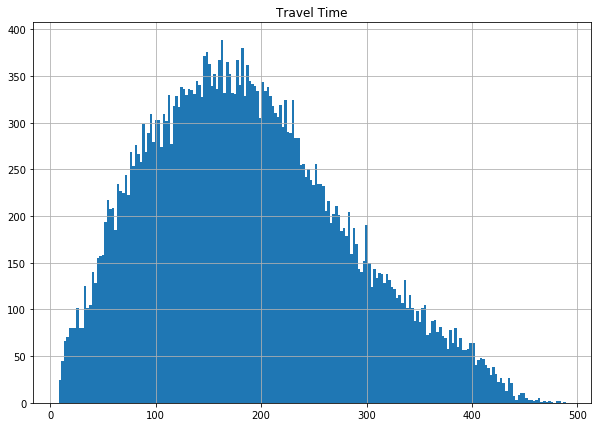

In [53]:
#histogram for travel time
drone_data.hist("Travel Time",bins = 200,figsize=(10,7))

The Distribution plot of Travel Time looks Gaussian. The TRavel Times are distributed in a semi-systemtaic fashion. We can observe that most of drones have travel time between 100 to 200 mins and very few drones fly more than 250 minutes and above.

The Plot suggests that the distribution of Travel Time, like Journey Distance forms a Gaussian like curve. We can therefore, find the outliers just by considering The travel time as the basis for our outlier detection.

In [54]:
#counting the outliers in travel Time
mean = drone_data["Travel Time"].mean()
std = drone_data["Travel Time"].std()
count = 0
for each in drone_data["Travel Time"]:
    if each < mean-(3*std) or each > mean+(3*std):
        count +=1
print("Just by looking at the Travel Times by itself we can see there are a total of",count,"outliers")

Just by looking at the Travel Times by itself we can see there are a total of 11 outliers


Like with Journey Distance, we can see that there are 11 outliers just when we consider the Travel Time by itself. However removing these times would deprive us of arriving at special conclusions or cases. Also, TRavel Time might be dependent on several other factors like Journey Distance, Drone Type, Post Type etc. Therefore, removing outliers based on the distribution on just Travel Time would be incorrect.

#### 1.13 Delivery Time

The Delivery time column represens the time at which the drone delivered the package at the required address.

In [55]:
drone_data["Delivery Time"].dtype

dtype('O')

like Departure Time, Delivery time is also of type object

In [56]:
drone_data["Delivery Time"].isna().sum()

0

We can observe that there are no missing values in Delivery Time column.

In [57]:
#count of Departure Times with incorrect time formats
count = 0
for each in drone_data["Departure Time"]:
    d = each.split(":")
    if (int(d[0]) < 0 or int(d[0]) > 24) or (int(d[1]) < 0 or int(d[1]) > 60) or (int(d[2]) < 0 or int(d[2]) > 60):
        count += 1
        
print("There are a total of ", count,"number of incorrect Timings")

There are a total of  0 number of incorrect Timings


We can see that there are no illegitimate Timings in the Delivery Time column as well.

#### 1.14  Delivery Fare

The Delivery Fare column records the Delivery Fare for each of the drone Delivery. We perform both graphichal and non-grpahical analysis on this column.

In [58]:
drone_data["Delivery Fare"].min()

66.95

We can see that the minimum Delivery Fare is 66.95$.

In [59]:
drone_data["Delivery Fare"].max()

1166.17

In [60]:
round(drone_data["Delivery Fare"].mean(),2)

148.46

The mean delivery fare is 148.5$.

In [61]:
drone_data["Delivery Fare"].isna().sum()

30

However, there are 30 missing values in the Delivery fare column. Is the fare dependent on Drone type, Travel Distance, Travel Time, Post Type, or Package Weight. We analyse the relationship in greater details going forward.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002713A7375C0>]],
      dtype=object)

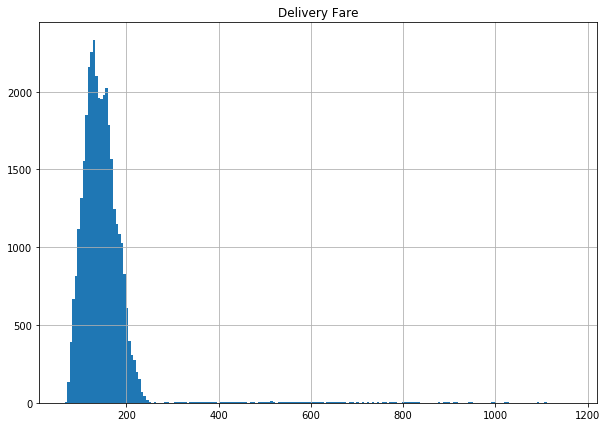

In [62]:
drone_data.hist("Delivery Fare",bins = 200,figsize=(10,7))

We can observe that the delivery fare is unevenly distributed. With maximum Delivery Fare in the range 0 to 200 and very few drones charging more than 250$. These could be potentially termed as Outliers. We have to dwell upon this distribution and come up with accurate impuation methods to impute the missing values. WE perform this activity going forward.

## In-Depth Analysis

### 2. Bivariate Analsysis

Now that we have concluded performing univariate analysis, we have to now jump into performing Bi-variate analsyis. The analysis carried out in this section is more comprehensive and more insightful. This kind of analysis, should potentially give rise to a correlation between any two columns/variables of a Dataframe. This section would involve picking up of any two columns performing grpahical and non-graphical exploratory data analysis(Where applicable).

#### 2.1 Drone Type Vs Package Weight

Drone Type and Package Weight could potentially be related to each other in a way that A particular Drone Type will be used for a Package of a particular weight. Thereby this relation would help us identify meaningful insgihts into patterns or discrepencies in the Package weight , considering all the drone types are correct as of now.

In [63]:
#mean aggregation package weight with respect to Drone Type
drone_data.groupby("Drone Type").agg({"Package Weight":"mean"})

,Package Weight
Drone Type,
1.0,25.563738
2.0,25.976590
3.0,26.003912


Contradictory to our hypotheses about Drone Type related to Package Weight, we can see that there is no particular realtion regarding a drone type carrying packages of certain weight only. The weights carried by each of the Drone Type is almost the same on an average. Therefore, we cannot form any meaningful relationship among Drone Type and Package Weight.

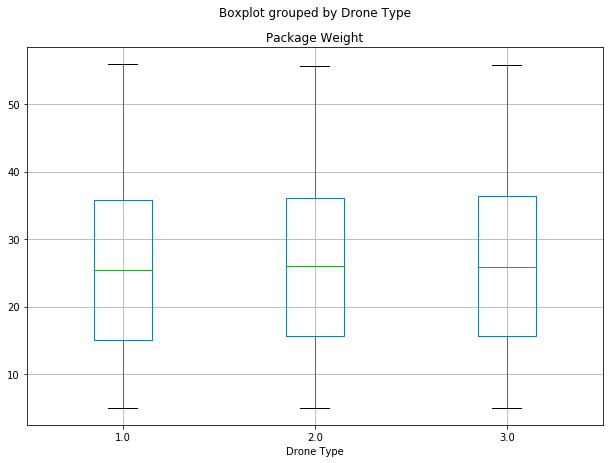

In [64]:
drone_data.boxplot("Package Weight",by="Drone Type",figsize=(10,7),fontsize=10)

Confirmation from the Box plots, we can see that Each of the Drone Type has a similar relation in terms of package weights. therefore, we cannot infer anything meaningful from this relationship.

#### 2.2 Id vs Post Type

This might come across as strange, Conventionally Id's are independent unique entitites that generally do not depend on any other values. However upon close inspection, in this case, we can observe a very subtle yet comprehensive correlation between Id and Post type.

In [65]:
drone_data[["Id","Post Type"]].head(10)

,Id,Post Type
0,ID1849655011,0.0
1,ID1657730481,0.0
2,ID5703224111,1.0
3,ID1442322586,0.0
4,ID1830381771,0.0
5,ID1451563598,0.0
6,ID1143543691,0.0
7,ID1600250538,0.0
8,ID5649368894,1.0
9,ID5938541782,1.0


We can observe a pattern from the above slice of dataframe. Predominantly there are 2 types of Id's. The one's starting with a pattern <b>"ID1XXXXXXXXXX"</b> and other being <b>"ID5XXXXXXXXXX"</b>. The one's having a the pattern of the former has a Post Type of <b>0</b> and the Id's with the pattern of the latter has the Post type of <b>1</b>. The advantage of this relationship is that we can easily predict the values of missing Post Type values given that we know the Id of the corresponding record. However, the flipside of the relationship is that we cannot predict an arbitrary Id value from the given Post Type value. Atmost we can predict whether it starts with either one of those aforementioned patterns. However we cannot guess the succeeding numberical values.

In order to establish a relationship from a graphical manner, we can create dummy column containing the numerical values of Id and plot the realtionship.

In [66]:
#creating a dummy column and filling 0 for nulls
drone_data["Id_dummy"] = drone_data["Id"]
drone_data["Id_dummy"].fillna(0,inplace=True)
drone_data["Id_dummy"].head()


0    ID1849655011
1    ID1657730481
2    ID5703224111
3    ID1442322586
4    ID1830381771
Name: Id_dummy, dtype: object

In this step we are filling the null values with 0. This step helps us in performing necessary processing steps going forward.

In [67]:
#performing string replacement to get the number part of Id
for id_val in drone_data["Id_dummy"]:
    if id_val != 0:
        ac_id = id_val[2:len(id_val)] 
        drone_data["Id_dummy"].replace(to_replace = id_val, value = ac_id,inplace = True)
drone_data["Id_dummy"].head()

0    1849655011
1    1657730481
2    5703224111
3    1442322586
4    1830381771
Name: Id_dummy, dtype: object

In the above code snippet we are truncating the Id strings by getting rid of the null "ID" part of the Id and converting to a string of just numbers.

In [68]:
#convertig to number
drone_data["Id_dummy"] = pd.to_numeric(drone_data["Id_dummy"])

Since we need to plot these two values against each other to establish a relationship, we have to convert the Data type to numeric.

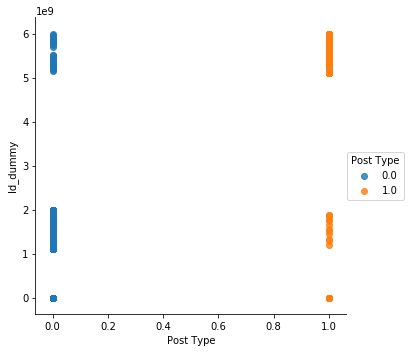

In [69]:
#plotting for post type versus Id_dummy
seaborn.lmplot(x='Post Type',y='Id_dummy',data=drone_data,hue='Post Type',fit_reg = False)

We can now see the established relationship between Id and Post type. we can see dense points for Id's starting with with 1 having their Post Type to be 0, and a dense collection of data is observed in Id's with value starting with 5 having Post Type as 1. However we can see that there are incorrect values in both cases. Id's with starting value 5 have Post Type as 0 and that Id's with starting with 1 have a few a Post Type of 1. We need to rectify these errors. Also we can observe that there are null values (Id's with value 0 which were imputed for missing values). However we cannot assign these values back to their orginal group, doing that we would randomize the Id values, which is not a good practice.

Therefore, in order to correct the incorrect Post Type values in accordance to the Id values, we have to firstly look for incorrect Id's and secondly impute the missing values in Post type.

Since we are correcting Post type values in accordance with Id, we have to check if there are any null Id's for null Post Types. Therefore we have to look for those indexes which have both Id and Post Type as null. In that case, we wouldnt be able to fix the Post Type.

In [70]:
#finding indexes of those rows with both Id and Post type as null
drone_data[(drone_data["Id"].isnull()) & (drone_data["Post Type"].isnull())].index.tolist()

[]

We can see that there are no rows wherein, both Id and Post Type are null, therefore we can carry out further processing to correct Post Type values

In [71]:
drone_data["new_id"] = drone_data["Id"].str[0:3]
drone_data["new_id"].head()

0    ID1
1    ID1
2    ID5
3    ID1
4    ID1
Name: new_id, dtype: object

Here, we are extracting only the first 3 characters of the Id column. This way we can easily identify the misclassified Post Type and rectify it accordingly.

In [72]:
#correcting misclassified post type value with 0
index = drone_data[(drone_data["new_id"] == "ID1") & (drone_data["Post Type"] != 0)].index.tolist()
for each in index:
    drone_data.iloc[each,drone_data.columns.get_loc("Post Type")] = 0

In the above code snippet, we are replcaing misclassified Post Type values with their actual Post Types. That is, if Id is with "ID1" and has a Post type of not 0, we replace it with 0.

In [73]:
#correcting misclassified post type value with 1
index = drone_data[(drone_data["new_id"] == "ID5") & (drone_data["Post Type"] != 1)].index.tolist()
for each in index:
    drone_data.iloc[each,drone_data.columns.get_loc("Post Type")] = 1

In the above code snippet, we are replcaing misclassified Post Type values with their actual Post Types. That is, if Id is with "ID1" and has a Post type of not 0, we replace it with 0.

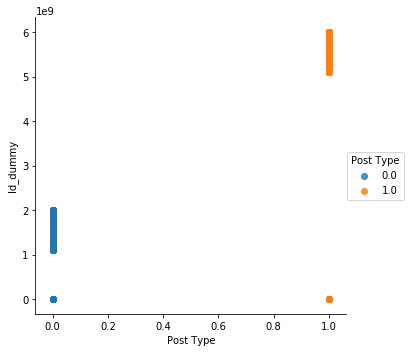

In [74]:
seaborn.lmplot(x='Post Type',y='Id_dummy',data=drone_data,hue='Post Type',fit_reg = False)

We can observe of that the Post Type are correctly classified with respective ID's. However we can also confirm this performing filtering on the drone Dataset.

In [75]:
drone_data[drone_data["new_id"] == "ID1"]["Post Type"].unique()

array([0.])

We can confirm that all id's with "ID1" have Post Type as 0.0

In [76]:
drone_data[drone_data["new_id"] == "ID5"]["Post Type"].unique()

array([1.])

Similarly, we can also confirm that all Id's wiht "ID5" have Post Type as 1.0

In [77]:
drone_data["Post Type"].value_counts()

0.0    25038
1.0    10698
Name: Post Type, dtype: int64

We can also observe that the respective value counts have increased and the sum of the occurences of both the value counts equals the size of the Dataframe. Which also confirms that there are no null values left behind.

In [78]:
drone_data.drop(labels=['new_id',"Id_dummy"],axis='columns',inplace=True)

Lastly, We can observe from the scatter plot and the post non-grpahical analysis that all corresponding Post Type values were changed to the appropriate formats. Therefore, we can say that all the Post Type values are devoid of errors and null values.

##### 2.2.1 Post Type V/s Journey Distance

Conventionally, in any sort of delivery service, we can think of the service provided by a company is dependent on certain factors like the Distance covered or the time taken for the delivery to happen. Considering the same base hypotheseis, we are looking for certain insights into the relationship between the Post Type and the Journey Distance. WE first perform non-graphical analysis and then the graphical analysis.

In [79]:
drone_data.groupby("Post Type").agg({"Journey Distance":"mean"})

,Journey Distance
Post Type,
0.0,214.489968
1.0,212.395105


From the above aggregation of Mean journey Distances for each of the Post Type, We cannnot see a major difference between the Distances covered by either of the Post Types. Therefore we cannot come to any conclusive insight regarding the relationship between Post Type and Journey Distance through non-graphial anlysis.

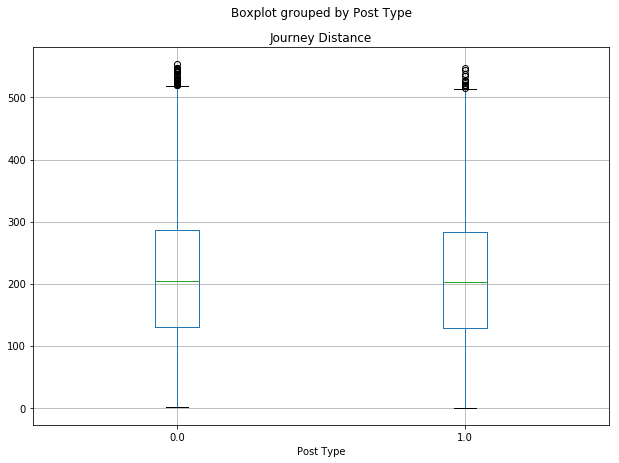

In [80]:
drone_data.boxplot("Journey Distance",by="Post Type",figsize = (10,7),fontsize = 10)

The above box plot affirms what we concluded from the non-graphical analysis, that we cannot come to any definite conclusion with regards to the relationship between Post Type and Journey Distance. Therefore our Base Hypotheses was incorrect to start with.

##### 2.2.2 Post Type V/s Travel Time

The Problem description mentions that Post Type has 2 types of services. O indicating the normal delivery and 1 indicating express delivery. WE would like to a have a hypothesis that Post Type is dependent on the Travel Time. We would like to think that Post Type takes longer to be delivered than that of Post Type 1

In [81]:
drone_data.groupby("Post Type").agg({"Travel Time":"mean"})

,Travel Time
Post Type,
0.0,188.390892
1.0,186.481520


Our Hypotheses although True, we cannot entirely rely on the results. REsoan being , the TRavel Times are really close to each other and there isnt a substantial difference between the Travel Times for each of the Post Types. Therefore accepting our hypothese can lead to discrpencies during our processing.

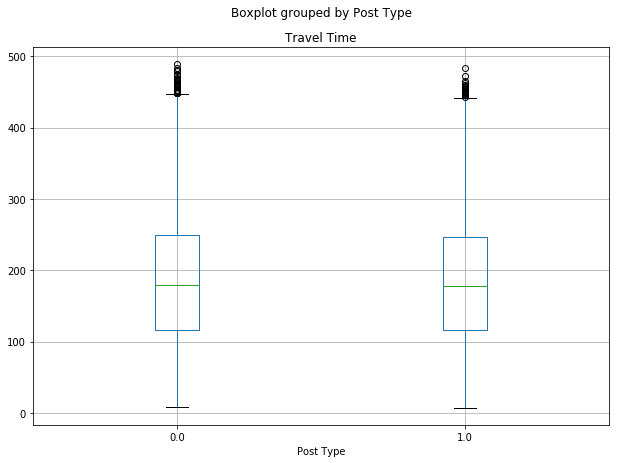

In [82]:
drone_data.boxplot("Travel Time",by="Post Type",figsize = (10,7),fontsize = 10)

The plot cements our previous explanantion of there being no substantial difference among the TRavel Times. Therefore we cannot determine a definitive relationship among Post Type and Travel Time.

##### 2.2.3 Post Type Vs Packgae Weight

In accordance to Post Type we would like to think of a possible correlation between post type and the package weight. ASsuming a package weight of certian limit is assigned a Post Type. If we can establish a relationship with the hypotheses, this would give us good insights regarding the relationship. First let us find out the correlatin coefficient among the two.

In [83]:
drone_data["Post Type"].corr(drone_data["Package Weight"])

-0.0027025959076855594

From the correaltion coefficient we can see that there is a minute negative correlation among the two entities. This suggests that there is no definitive relationship among Post Type and Package Weight.

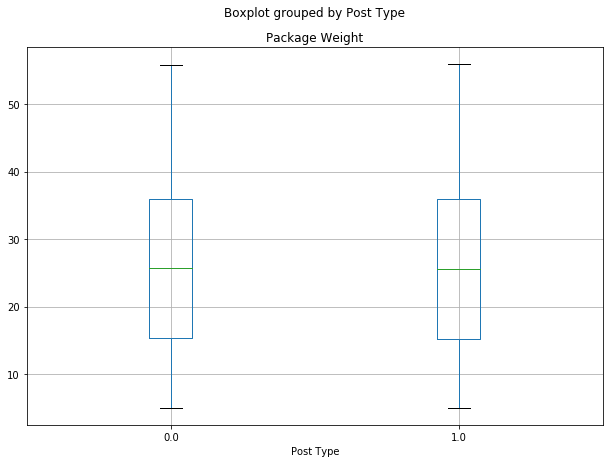

In [84]:
drone_data.boxplot("Package Weight",by="Post Type",figsize = (10,7),fontsize = 10)

Like we mentioned, there is no Definitive realtinship among Post Type and Package WEight. Both the Post type have their IQR values within the same region therefore disproving our hypotheseis.

<b><i>Concluding from all the previous Visulizations and relationships of Package Weight with regards to a standalone entity or in terms of realtionship with other feature, we observe that there are no discrepencies as far as Packaga Weight is concerned. We observe that Package Weight Gaussian like Distribution. We can find outliers using 3sigma rule. But these outliers exhibit special cases and removing these would cause a loss in the varaince, which is not ideal for a real world Dataset.</i></b>

#### 2.3 Origin Region vs Origin Latitude and Logitude

Conventionally, A region is a collection of set of latitudes and longitudes. Also, This correlation makes sense because a Region can be classified with a Latitude and Longitude boundry. Ideally, every region should hava set of Latitudes and Longitude coordinates which fall within a certain limit of latitudes and longitudes. Based on these clusters, each region is demarcated with specified boundaries. Now since this is a data that has noises and the task at hand is to clean up these values. we have to consider the following situations.
<ul>
    <li>The possibility of Latitudes and Longitudes being incorrect, but the Origin Region is correct</li>
    <li>Secondly, the possibility of a Data point belonging to an incorrect region, but the Latitude and Longitude information i s correct</li>
</ul>

Now, how can we possibly identify these data points ? Applying the Data modeling concepts and considering the latitude and longitudes are continuous variables, will showcase Gassuian like distribution. We can apply the rule of 3 standard deviations to identify the outliers. These outliers will belong to one of the above 2 aforementioned reasons. We have to fix accordingly.

<b>First let us visualize.</b>

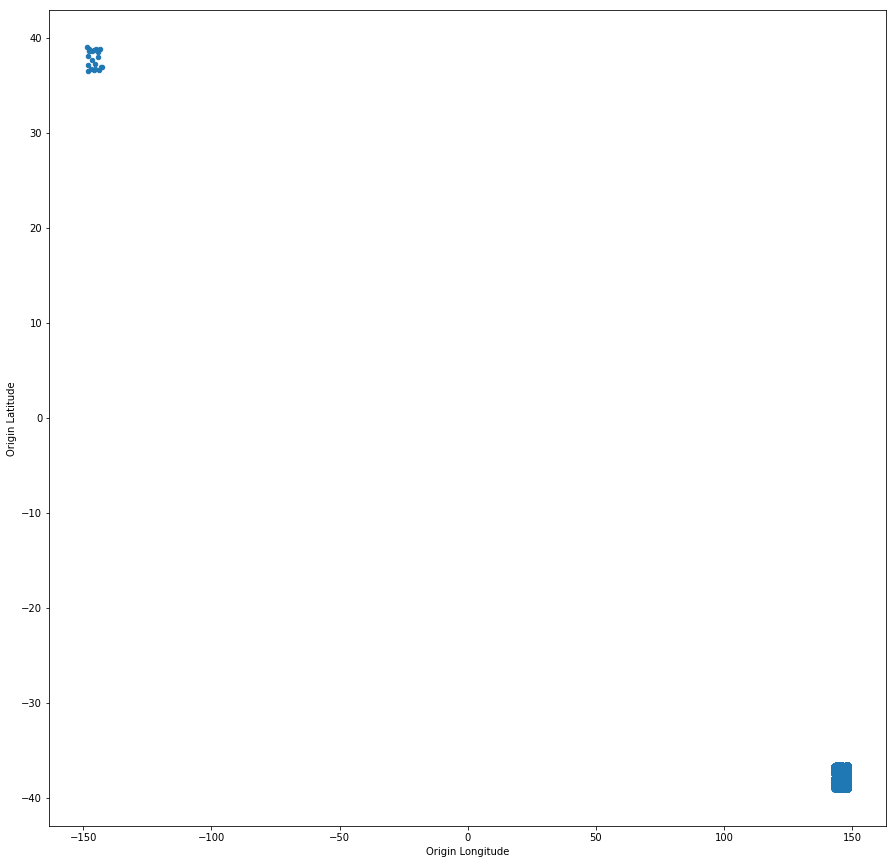

In [85]:
drone_data.plot.scatter(y="Origin Latitude",x="Origin Longitude",figsize=(15,15))

We can see that Origin Latitude and Longitude get grouped in clusters where each region has data points belonging to the same region. What we can interestingly note frome the above plot is that majority of the clusters are very closely grouped towards the bottom right corner of the plot. This suggests that most of the data points have latitude values between -30 and -40 and Longitude values from 130 to 150. Considering the Drone Service is meant for Victoria, which is in the southtern hemisphere, we can conclude that these points on the bottom right are correct. Gepgraphically, Victoria should have negative latitudes and positive longitudes. However, the points at the top left corner suggest they have positive latitude and negative longitude. These data points do not belong to victoria. Therefore , we have to correct these Latitude and longitudes by inverting the signs to ensure they belong to Victorian geography not somewhere else.

WE can now look at a specific region, which shows the grouping of data points within a cluster.

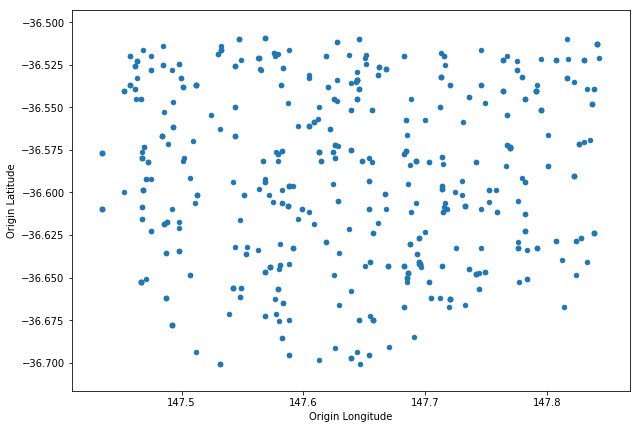

In [86]:
drone_data[drone_data["Origin Region"] == 17].plot.scatter(y="Origin Latitude",x="Origin Longitude",figsize=(10,7))

The above plot resembles a cluster of Latitude and Longitude points for region 17. By the looks of it all the Coordinates belonging to this region, appear to be contained within the bounds of a cluster. However , some regions might have outliers. We can visulize those regions using the same approach.

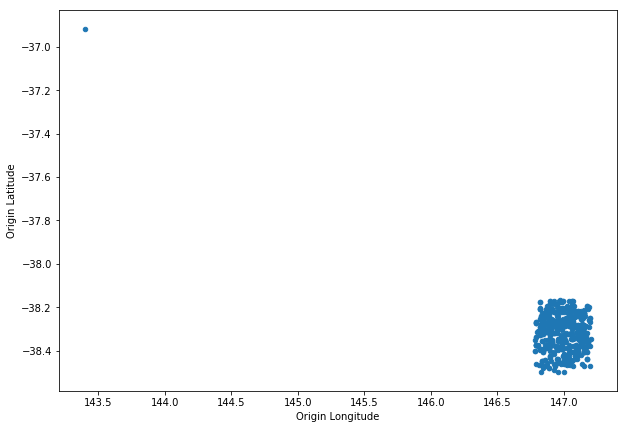

In [87]:
drone_data[drone_data["Origin Region"] == 46].plot.scatter(y="Origin Latitude",x="Origin Longitude",figsize =(10,7))

From the above scatter plot, we can see that there is an isolated data point which has latitudes and Longitude value which doesnt fit the cluster for that region. This Data point is an outlier for this region. We can see that it has legitimate Latitude and Longitude values but the outlier data point seems to belong to a different region. 

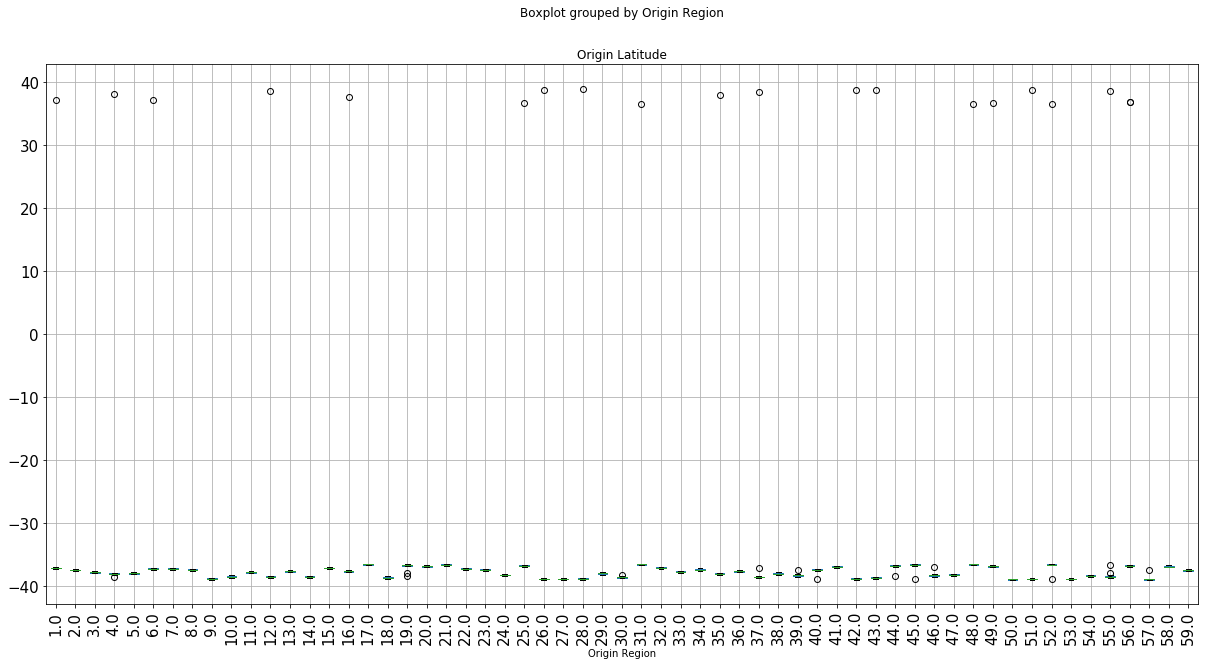

In [88]:
drone_data.boxplot('Origin Latitude',by='Origin Region',figsize=(20,10),rot = 90,fontsize = 15)

From the above boxplot we can identify outlier Origin Latitude from the Origin Region. For each Origin Region, there are a few data points which have latitudes that are positive, while most of the data points have negative latitude values. Subsequently, there are outliers which belong to a different region but has legitimate Latitude values. These outliers are detected using IQR values. Which basically follows 3 standard devitions principle. which considers 99.7% of the data falls within the specified boundaries, while the ones lying outside are considered outliers. We have to perform procedures to impute these values correctly.

Similarly, we can plot a box plot for Longitude for all the Origin Regions as well.

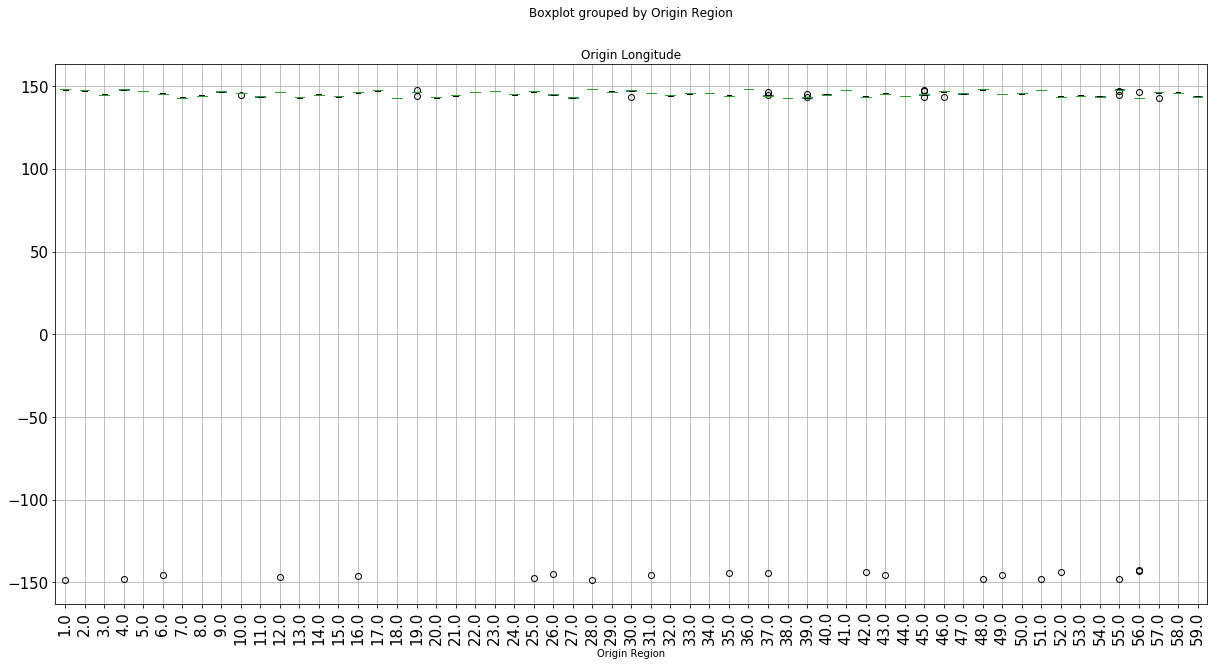

In [89]:
drone_data.boxplot('Origin Longitude',by='Origin Region',figsize=(20,10),rot = 90,fontsize = 15)

#### 2.4 Destination Region vs Destination Latitude and Longitude


All the principles and operations stated above for the Origin region and associated Latitude and Longitude values hold good for Destiantion region and its associated Latitude and Longitude values as well. We directly jump into visulization.

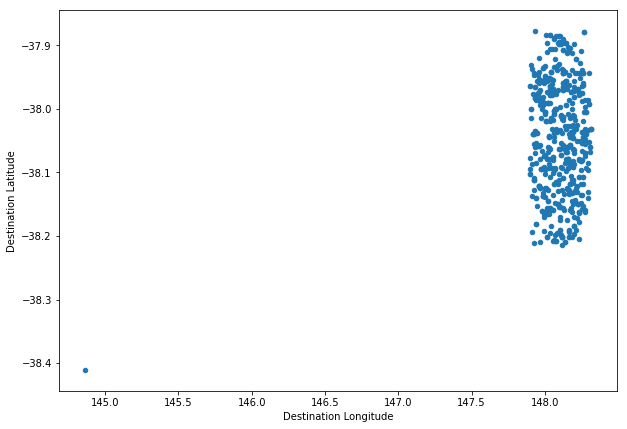

In [90]:
drone_data[drone_data["Destination Region"] == 4].plot.scatter(y="Destination Latitude",x="Destination Longitude" ,figsize =(10,7))

The above scatter plot showcases the distribution of latitudes and longitudes for this cluster. we can observe an outlier in the above plot, which seems to appear in another region, but is named after region 4. we have to take care of such discrepencies.

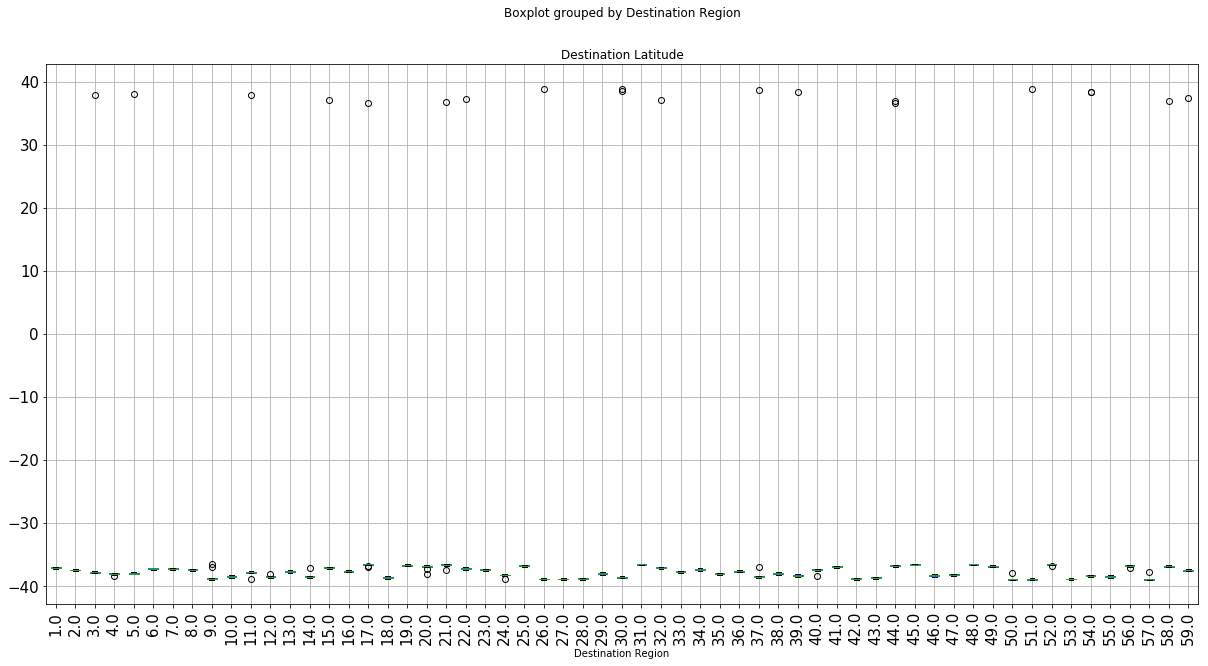

In [91]:
drone_data.boxplot('Destination Latitude',by='Destination Region',figsize=(20,10),rot = 90,fontsize = 15)

Similar to Origin region values, we can observe there are fair amount of outliers appearing beyond the IQR of the box plot. some of them have incorrect latitude and longitude values whereas some of the latitude and longitude values belong to some other Region but is tagged with the same other region.

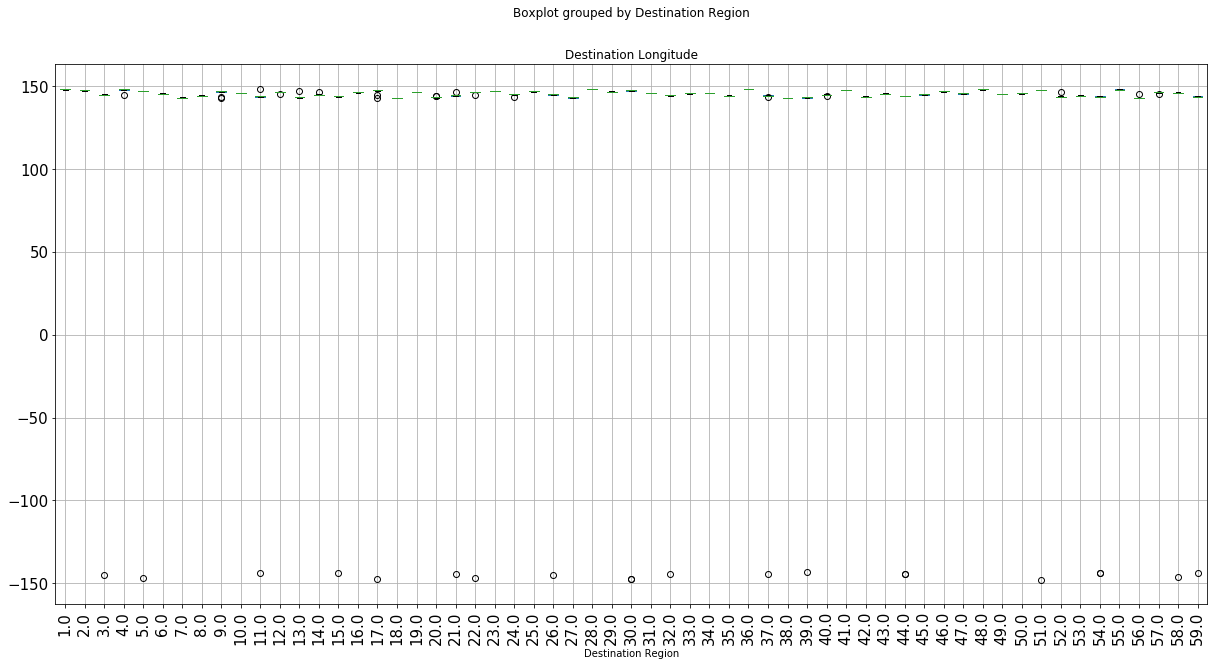

In [92]:
drone_data.boxplot('Destination Longitude',by='Destination Region',figsize=(20,10),rot = 90,fontsize = 15)

We have to come up with a comprehensive framework that would identify and rectify these outliers. We do that in the next stage.

##### 2.3.1 Correction of Origin Region, Latitiude and Longitude.

We have to first ascertain the median Latitude and Longitude value for each Origin Region. We consider median as the statistic measure that describe the central tendency of the latitude and longitude distriibution. This is becuase, we know for a fact that certian regions have incorrect Latitude and longitude values, which means there is abnormally huge gap between the values of a cluster with the outlier values. Mean statistic measure would conisder weights of these data points and we would end up with inaccurate values as reference values.

In [93]:
#caluclating median latitude and longitude for each origin region
mean_data = drone_data.groupby("Origin Region").agg({"Origin Latitude":{"meanOriginLat":'median'},"Origin Longitude":{"meanOriginLong":"median"}})
mean_data.columns=mean_data.columns.droplevel(0)
mean_data=mean_data.reset_index()
mean_data.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Origin Region,meanOriginLat,meanOriginLong
0,1.0,-37.133160,148.230530
1,2.0,-37.456938,147.626126
2,3.0,-37.835718,144.843668
3,4.0,-38.050574,148.106956
4,5.0,-37.999268,147.222341


The following function describes the means to calculate distance between a set of two Latitude and Longitude values.

In [94]:
#function ot find the distance between a set of latitudes and longitudes
def distance(meanLat,meanLong,act_Lat,act_long):
    meanLat = radians(meanLat)
    meanLong = radians(meanLong)
    act_Lat = radians(act_Lat)
    act_long = radians(act_long)
    R = 6378.0
    #dlon = act_long - meanLong
    #dlat = act_Lat - meanLat
    dlon = meanLong - act_long
    dlat = meanLat - act_Lat
    a = sin(dlat / 2)**2 + cos(act_Lat) * cos(meanLat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R*c

The following function returns a set of outliers which takes a set of arguments. The first one being the entire dataframe, followed by the aggregated data based on region and lastly a column parameter which takes either "Origin" or "Destination" parameters and performs actions on Origin and Desitnation information respectively. The function returns a dictionary with key represeting the region and a list of tuples which specify outlier latitude and longitude coordinates.

In [95]:
#function to find the outliers latitudes and longitudes for each region and incorrect latitude and longitude
def get_outliers(drone_data,mean_data,column):
    outlier_info = dict()
    for orig,lat,long in zip(mean_data[column+" Region"],mean_data["meanOriginLat"],mean_data["meanOriginLong"]):
        origin_out = []
        drone_region_subset_x = drone_data[drone_data[column+" Region"] == orig][column+" Latitude"]
        drone_region_subset_y = drone_data[drone_data[column+" Region"] == orig][column+" Longitude"]
        std_x = py.std(drone_region_subset_x)
        std_y = py.std(drone_region_subset_y)
        for each_lat,each_long in zip(drone_region_subset_x,drone_region_subset_y):
            if ((each_lat < lat-(3*std_x)) or (each_lat > lat+(3*std_x)) or ((each_long < long-(3*std_y)) or (each_long > long+(3*std_y)))):
                origin_out.append((each_lat,each_long))
        if(len(origin_out)):
            outlier_info[orig] = origin_out
    return outlier_info

The following funciton rectifies the incorrect Latitude and Longitude values and replaces them in the respective indexes in the drone_data Dataframe. Addtionally, this function returns a dictionary which specifies latitude and longitude outliers which supposedly belongs to another region and its respective distances with all the regions.

In [96]:
#function to rectify outliers for the regions
def rectify_outliers(drone_data,mean_data,outliers,column):
    outer_dict = dict()
    for k in outliers:
        key_list = []
        for each_tupe in outliers[k]:
            if each_tupe[0] > 0 and each_tupe[1] < 0:
                #print(k,"has wrong lat and long")
                ind = drone_data[(drone_data[column+" Region"] == k) & (drone_data[column+" Latitude"] == each_tupe[0]) & (drone_data[column+" Longitude"] == each_tupe[1])].index
                drone_data.iloc[ind,drone_data.columns.get_loc(column+" Latitude")] = each_tupe[0] * -1
                drone_data.iloc[ind,drone_data.columns.get_loc(column+" Longitude")] = each_tupe[1] * -1
            else:
                closest_lat = dict()
                for orig,meanLat,meanLong in zip(mean_data[column+" Region"],mean_data["meanOriginLat"],mean_data["meanOriginLong"]):
                    closest_lat[orig] = distance(meanLat,meanLong,each_tupe[0],each_tupe[1])
                key_list.append(closest_lat)
        if len(key_list):
            outer_dict[k] = key_list
    return outer_dict   

This function takes the dictionary taken from the previous function and provides a list which specifies the closest region against each of the outlier coordinates with repective region numbers as the key.

In [97]:
#function to find the nearest region for a latitude and longitude
def find_nearest(outer_dict):
    nearest_list = []
    for k in outer_dict:
        for j in outer_dict[k]:
            for key in j:
                if j[key] == min(j.values()):
                    nearest_list.append((k,key))
    return nearest_list 

This function returns the indices of the wrongly placed region numbers in the dataframe. this information will come in handly will modifying the respective values in the dataframe.

In [98]:

def find_bad_reg_index(origin_bad,outliers,column):
    origin_bad_dict = dict()
    for each in origin_bad:
        for each_out in outliers:
            if each == each_out:
                ind_list = []
                for each_tuple in outliers[each_out]:                
                    ind_list += drone_data[(drone_data[column+" Region"] == each) & (drone_data[column+" Latitude"] == each_tuple[0]) & (drone_data[column+" Longitude"] == each_tuple[1])].index.tolist()
                origin_bad_dict[each] = ind_list
    return origin_bad_dict

This function merely converts the list of distances into a dictionary. This is essential to get the data in proper format that would help in performing further operations.

In [99]:
def convert_to_dict(nearest_val):
    nearest_dict = dict()
    for each in nearest_val:
        if each[0] not in nearest_dict:
            int_list = []
            int_list.append(each[1])
            nearest_dict[each[0]] = int_list
        else:
            nearest_dict[each[0]].append(each[1])       
    return nearest_dict

The following function basically replaces the incorrect region numbers with the correct region numbers at respective indexes.

In [100]:
def rectify_regions(nearest_dict,bad_index,column):
    for k in nearest_dict:
        for j in bad_index:
            if k==j:
                for i in range(len(nearest_dict[k])):
                    drone_data.iloc[bad_index[j][i],drone_data.columns.get_loc(column+" Region")] = nearest_dict[k][i]

Following is the control block which calls all the above fucntions in a specific manner which fixes incorrect and outlier regions and latitude and longitude coordinates. The program block is bound in while loop considering there is a possibility that after the first set of outliers were found and fixed, a new set of outliers may arise which need to be handled as well. Therefore a while loop handles such a situation.

In [101]:
#code block to run all the above functions until we have no more outliers left
while(len(get_outliers(drone_data,mean_data,"Origin"))):
    count = 1
    print("The number of outliers in",count, "iteration is :",len(get_outliers(drone_data,mean_data,"Origin")))
    origin_outliers = get_outliers(drone_data,mean_data,"Origin")
    outer_dict = rectify_outliers(drone_data,mean_data,origin_outliers,"Origin")
    origin_bad = list(set(outer_dict.keys()) & set(origin_outliers.keys()))
    nearest_dict = convert_to_dict(find_nearest(outer_dict))
    bad_index = find_bad_reg_index(origin_bad,origin_outliers,"Origin")
    rectify_regions(nearest_dict,bad_index,"Origin")

The number of outliers in 1 iteration is : 28
The number of outliers in 1 iteration is : 5


###### 2.3.2 Fixing origin region with null values

After the completions of fixing outliers, from univariate analysis, we had found out that origin region and destination column had null values. We have to impute these values with region it is the closest to. We start by identifying the indexes which have null values in origin values. the following function returns a list of indexes for all null values in the dataframe. This information will come in handy while imputing the null values.

In [102]:
#function to return the indices of null region values
def find_nulls(drone_data,column):
    return drone_data[drone_data[column].isnull()].index.tolist()

The follwing function takes the list of indexes and returns a dictionary which has a tuple of coordinates for that index. This information will be helpful in ascertainig the closest region from the given coordinates.

In [103]:
def get_null_orig_coord(null_origin_indexes,column):
    null_orig = dict()
    for each in null_origin_indexes:
        null_orig[each] = ((drone_data.iloc[each,drone_data.columns.get_loc(column+" Latitude")]),(drone_data.iloc[each,drone_data.columns.get_loc(column+" Longitude")]))
    return null_orig

The following function finds the closest region from a set of coordiantes of null regions. it returns a dictionary specifying the same.

In [104]:
def get_closest_reg(null_orig,column):
    closest_lat = dict()
    for each_index in null_orig:
        dist_dict = dict()
        for orig,meanLat,meanLong in zip(mean_data[column+" Region"],mean_data["meanOriginLat"],mean_data["meanOriginLong"]):
            dist_dict[orig] = distance(meanLat,meanLong,null_orig[each_index][0],null_orig[each_index][1])
        closest_lat[each_index] = dist_dict
    return closest_lat 

The following function fixes the null region values with appropriate region values.

In [105]:
def fix_null_reg(closest_lat,column):
    for ind in closest_lat:
        for k in closest_lat[ind]:
            if closest_lat[ind][k] == min(closest_lat[ind].values()):
                drone_data.iloc[ind,drone_data.columns.get_loc(column+" Region")] = k
            

The following code snippet is a control block which calls above defined function and obtain the result.

In [106]:
null_origin_indexes = find_nulls(drone_data,"Origin Region")
fix_null_reg(get_closest_reg(get_null_orig_coord(null_origin_indexes,"Origin"),"Origin"),"Origin")

Now that we have fixed Origin REgions and their corresponding Latitudes and Longitudes, we can visulaize them post Correction to see the effect of changes that were made.

##### 2.3.3 Visualization after fixing Origin Region, Latitude and Longitude

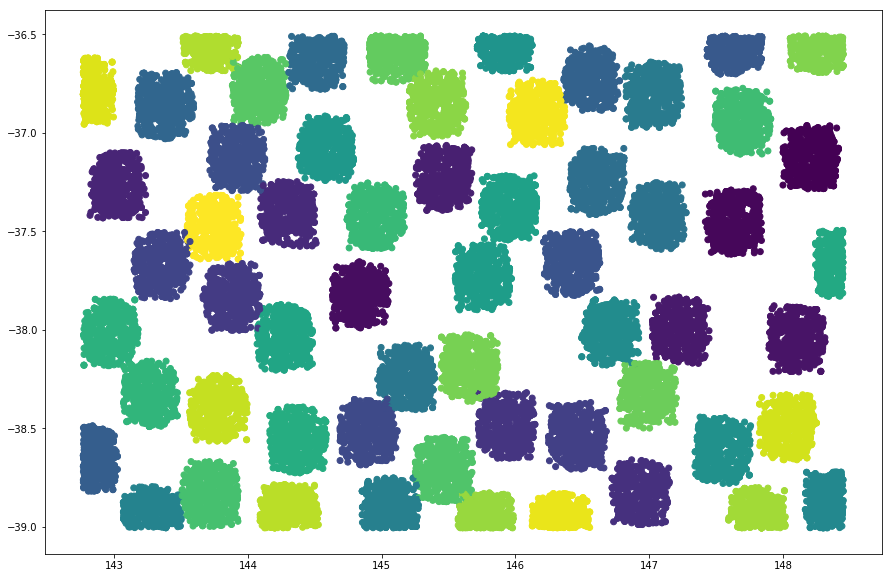

In [107]:
plt.figure(figsize=(15,10))
plt.scatter(x=drone_data["Origin Longitude"],y=drone_data["Origin Latitude"],c = drone_data["Origin Region"])

WE can also plot the Box plots to confirm that we dont have any outliers and that all the Latitudes and Longitudes Belong to their respective regions.

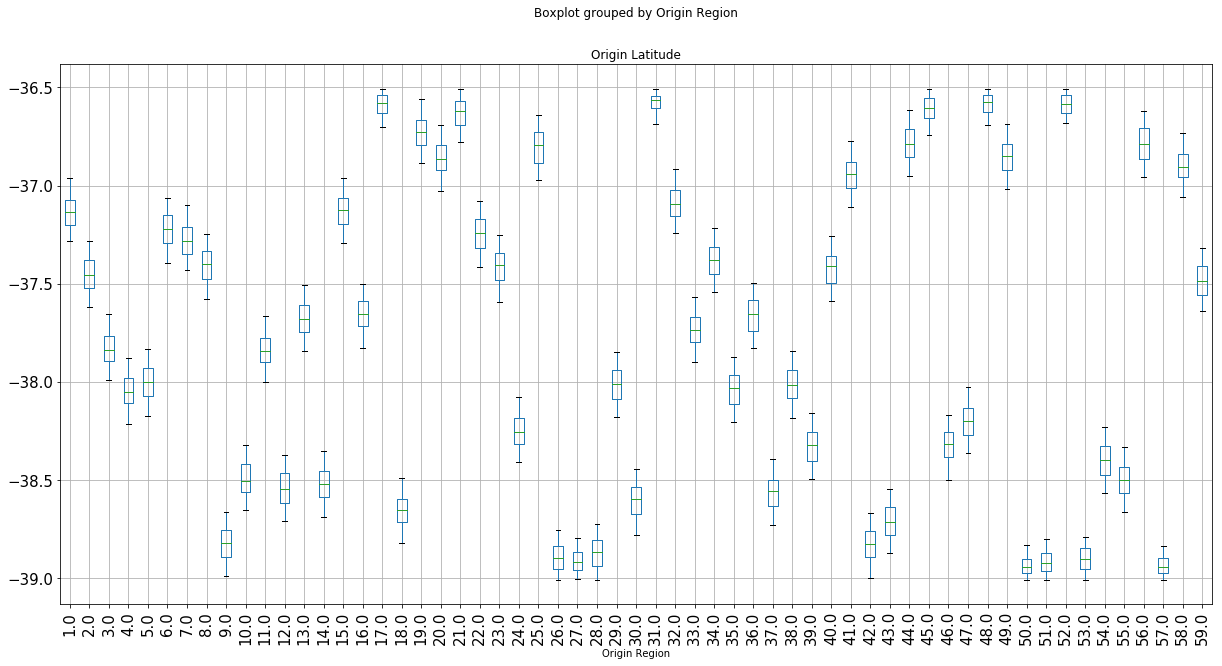

In [108]:
drone_data.boxplot('Origin Latitude',by='Origin Region',figsize=(20,10),rot = 90,fontsize = 15)

WE can see that there are no outliers and the latitudes are confined and ocntainied within the IQR for each region without any outliers.

##### 2.4.1 Correction of Destination Region, Latitiude and Longitude

In this section we perform actions similar to that of Origin Region and Latitude and Longitude values. We first start by creating a Dataframe which has median Latitude and Longitude values for Destination.

In [109]:
#aggregating for each destination the medain latitude and longitude
mean_data = drone_data.groupby("Destination Region").agg({"Destination Latitude":{"meanOriginLat":'median'},"Destination Longitude":{"meanOriginLong":"median"}})
mean_data.columns=mean_data.columns.droplevel(0)
mean_data=mean_data.reset_index()
mean_data.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Destination Region,meanOriginLat,meanOriginLong
0,1.0,-37.124759,148.227634
1,2.0,-37.457742,147.644621
2,3.0,-37.839837,144.832191
3,4.0,-38.050251,148.106956
4,5.0,-38.016693,147.227036


Now that we have defined all the functions previously, we can just call these functions in an orderely manner which would fix incorrect latitude and longitude values and incorrect Region numbers for destination. The following code snippet does the same.

In [110]:
#code block to call all the necessary functions and call outliers to habdle incoorect regions
while(len(get_outliers(drone_data,mean_data,"Destination"))):
    count = 1
    print("The number of outliers in ",count,"iteration is : ",len(get_outliers(drone_data,mean_data,"Destination")))
    dest_outliers = get_outliers(drone_data,mean_data,"Destination")
    outer_dict = rectify_outliers(drone_data,mean_data,dest_outliers,"Destination")
    dest_bad = list(set(outer_dict.keys()) & set(dest_outliers.keys()))
    nearest_dict = convert_to_dict(find_nearest(outer_dict))
    bad_index = find_bad_reg_index(dest_bad,dest_outliers,"Destination")
    rectify_regions(nearest_dict,bad_index,"Destination")
    count +=1


The number of outliers in  1 iteration is :  29
The number of outliers in  1 iteration is :  5


##### 2.4.2  Fixing null values for destination region

Now that all the incorrect values are rectified, we have to fix null destiantion region values. We have to call the previosuly defined functions and perform operations.

In [111]:
null_origin_indexes = find_nulls(drone_data,"Destination Region")
fix_null_reg(get_closest_reg(get_null_orig_coord(null_origin_indexes,"Destination"),"Destination"),"Destination")

##### 2.4.3 Visualization after fixing Destination Region, Latitude and Longitude

Now that we have corrected the Destination Latitudes and Longitudes, we can plot the clusters depicting each region. We are expecting a clear demarcation of regions without any presence of outliers.

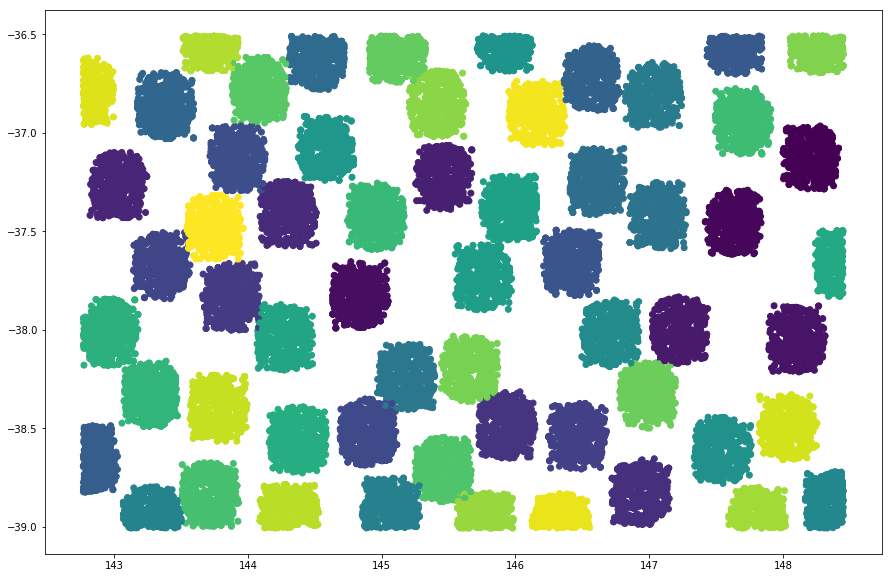

In [112]:
plt.figure(figsize=(15,10))
plt.scatter(x=drone_data["Destination Longitude"],y=drone_data["Destination Latitude"],c = drone_data["Destination Region"])

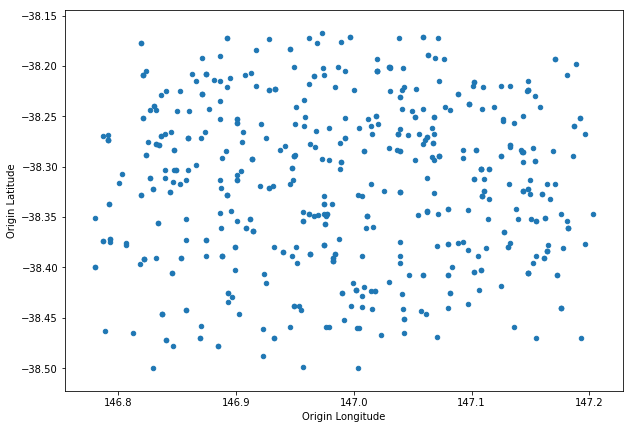

In [113]:
drone_data[drone_data["Origin Region"] == 46].plot.scatter(y="Origin Latitude",x="Origin Longitude",figsize =(10,7))

We see that there are <b>NO</b> outliers when compared to previous plot of the same region

Similarly, we can also plot a boxplot to visulaize if there are any outliers as far as Destination Region and Destinaation Latitude and Longitude are concerned.

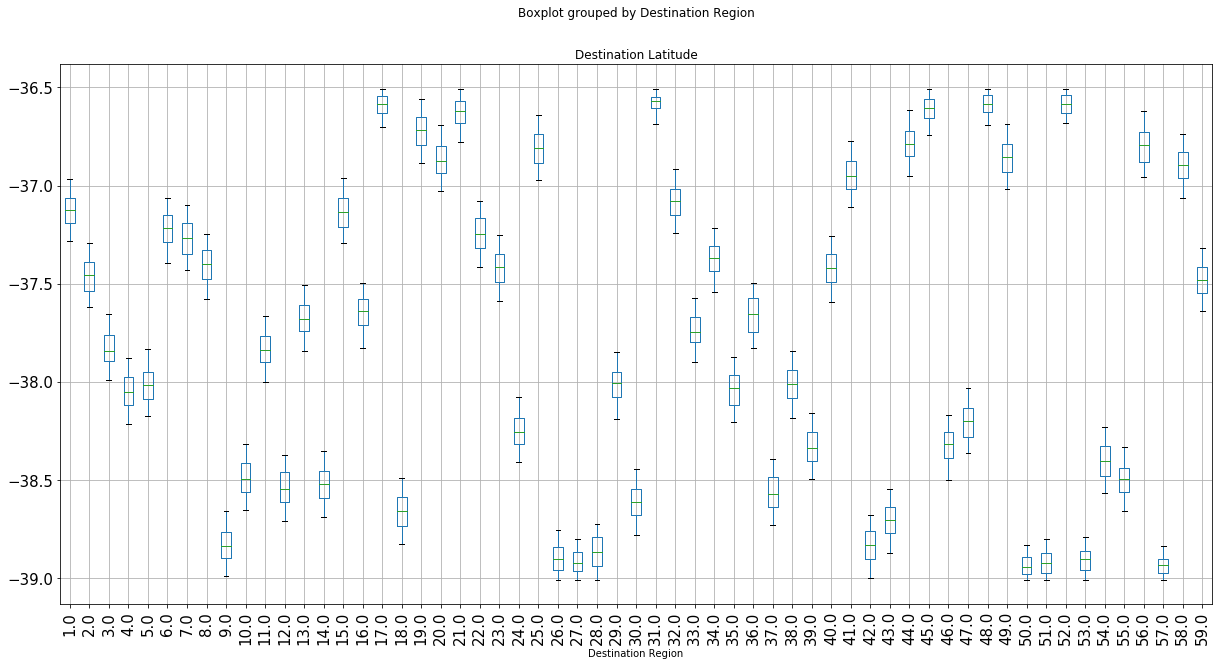

In [114]:
drone_data.boxplot('Destination Latitude',by='Destination Region',figsize=(20,10),rot = 90,fontsize = 15)

We can see that there are no visible outliers for Destination Regions in terms of Outliers too. therefore we can be now sure that our Origin and Destiantion Regions are fixed and that we can proceed further.

#### 2.5 Latitude & Longitude Distance v/s Journey Distance

Now that we have corrected the Latitude and Longitude for respective Origin Regions and Destination Regions, Mathematically we can calculate the Distance between a set of latitudes and longitudes. This way, we can ensure that all the values in Journey Distance. we can draw results from this operation and establish a relationship with the actual Journey Distance. This would be a good way of identify incorrect journey distance values. we can draw results from this operation and establish a relationship with the actual Journey Distance. This would be a good way of identify incorrect journey distance values. 

In [115]:
#code to caluclate distance from latatiude and longitude
calculated_distance = []
for orig_lat,orig_long,dest_lat,dest_long in zip(drone_data["Origin Latitude"],drone_data["Origin Longitude"],drone_data["Destination Latitude"],drone_data["Destination Longitude"]):
    calculated_distance.append(distance(orig_lat,orig_long,dest_lat,dest_long))
drone_data["Caculated Distance"] = calculated_distance
drone_data["Caculated Distance"].head()

0    127.689210
1    108.798846
2     46.251099
3    367.691501
4     23.268271
Name: Caculated Distance, dtype: float64

Now that we have a calcuated Distance available with us, we can plot the Calculated Distance and the Journey Distance to establish a relationship and also check the conformity of the calculated distance with the given Journey Distance. This way we can, determine which of the given distances are incorrect and replace the the incorrect distances with the corresponding Calculated Distances. For this, we are considering that all our caculated Distances are correct.

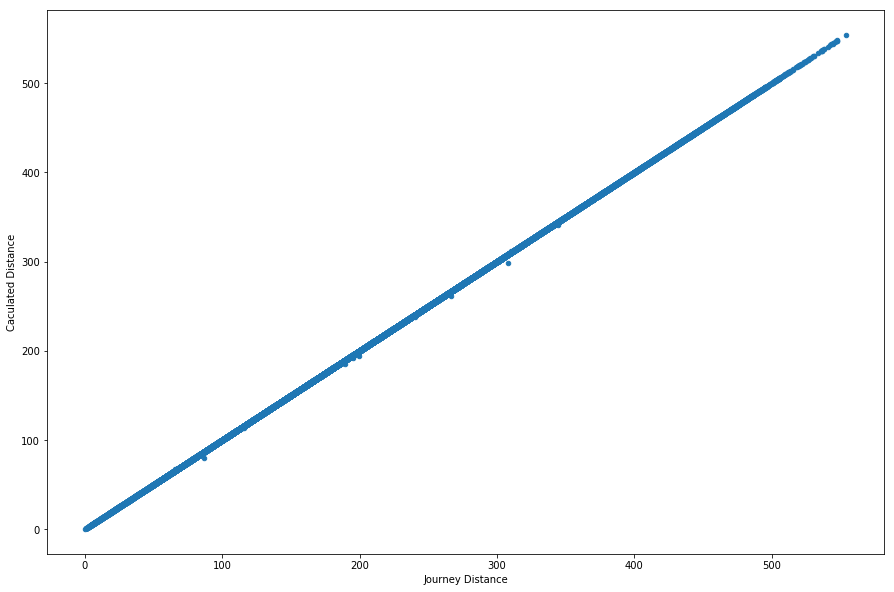

In [116]:
drone_data.plot.scatter(x="Journey Distance",y="Caculated Distance",figsize=(15,10),fontsize=10)

We can observe that although the two plot superimpose perfectly over each other,forming a straight line. However, we can still spot that the calculated Distance and Actual distance still have some values which do not conform. We fix those imperfections below.

In [117]:
#count of eqal distances
count = 0
for i,row in drone_data.iterrows():
    if round(row["Journey Distance"],3) != round(row["Caculated Distance"],3):
        drone_data.loc[i,"Journey Distance"] = row["Caculated Distance"]
        count +=1
print("A total of ",count,"Incorrect Journey Distances upto 3 decimal places were corrected")

A total of  15 Incorrect Journey Distances upto 3 decimal places were corrected


From the above code we can observe that, there were 15 given journey distances that did not match the Calculated distances. Therefore, we just impute the incorrect journey distances with the calculated journey distance.

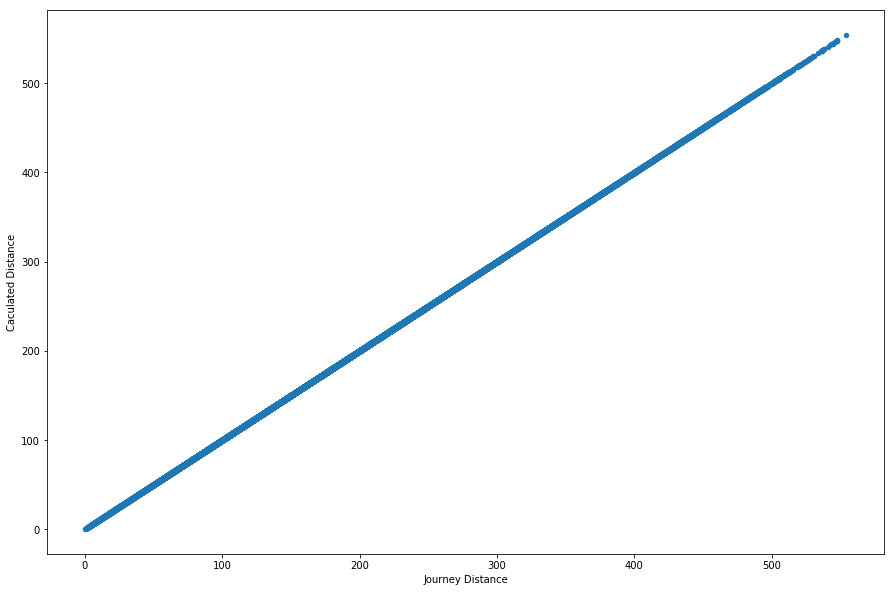

In [118]:
drone_data.plot.scatter(x="Journey Distance",y="Caculated Distance",figsize=(15,10),fontsize=10)

Post correction of data, we can see a straight line wherein the data clearly superimposes with each other and that the Journey Distance values and Calculated Distance Values are the same.

In [119]:
drone_data.drop(labels=['Caculated Distance'],axis='columns',inplace=True)

Now that we are sure that our Journey Distances are correct after replacing the incorrect journey distances with the appropriate Calculated Jounrey Distance, we can drop the Caculated Distance Column, which is demostrated in the above piece of code.

####  2.6 Drone Type v/s Travel Time / Journey Distance.

Now that we have corrected Distance values and we are assuming that all the given drone types are correct. WE have to establish a relationship between the Drone Type and the Journey Distance and Travel Time. 

In order to find a corrective measure to ascertain correct Travel Time values, we have to form a base hypthoses which states the following:
<li>We have to initially consider that the given Drone Types are correct </li>
<li>We have to consider that our journey Distance is 100% correct. This is necessary to carry out further operations.</li>
<li>We have to find out enroute speeds of each type of drone and also we need to ascertain the take-off and landing distancecs a drone covers</li>
<li>Based on the Drone Speed and the distances, we caluluate the travel time. If the calculated travel time comes out to be equal within a certain fault tolerant level, we can confirm that our assumption for the Drone Type was correct. However, if the Timings do not match, we can conclude that those Drone Type assumptions were wrong and we need to find that Drone Type which matches with the distance and travel time of the misclassifed Drone Type and replace with the actual drone type with the misclassified one.</li>


##### 2.6.1 Visualization of Relationships

WE first observe the Relationship among Travel Time and Distance for all the data instances in the drone dataset for each drone Type.

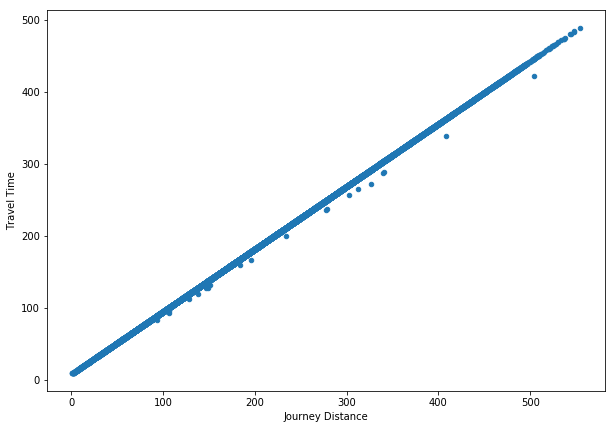

In [120]:
drone_data[drone_data["Drone Type"]==1].plot.scatter(x="Journey Distance",y="Travel Time",figsize=(10,7))

We can see that the Travel Time and Distance Realtinship for Drone type 1 mostly has all values conforming to the linear line. However, we can also see that there are certain data points which do not conform to the linear curve. We similarly plot for other 2 regions.

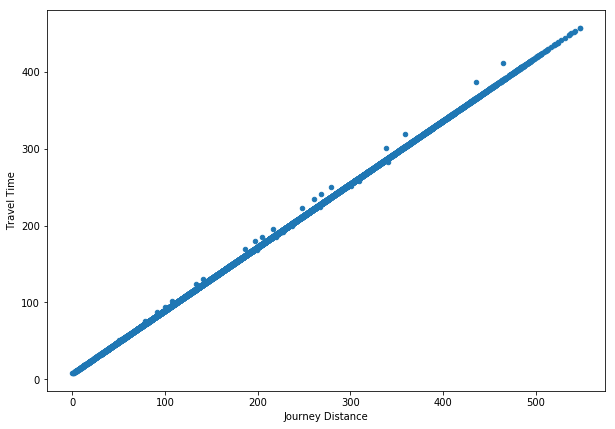

In [121]:
drone_data[drone_data["Drone Type"]==2].plot.scatter(x="Journey Distance",y="Travel Time",figsize=(10,7))

Similarly, we can considerable amount of data points which do not conform to the linear curve. These indicate that Travel Times of few of the Drone types of Value 2 do not conform to their respective distances.

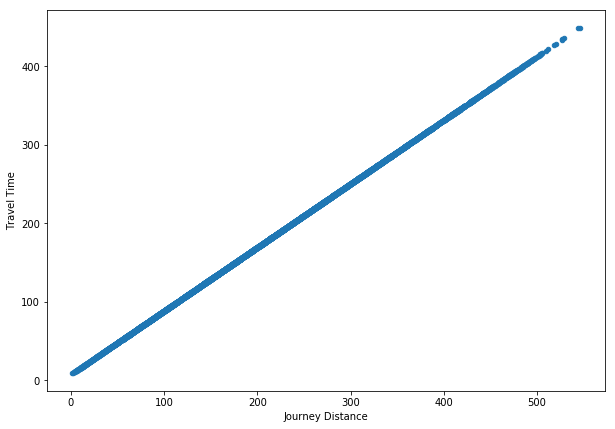

In [122]:
drone_data[drone_data["Drone Type"]==3].plot.scatter(x="Journey Distance",y="Travel Time",figsize=(10,7))

Surprsingly, we do not observe any data points that do not conform to majority linear curve. We can ssume that most of the TRavel Times for Drone Type 3 are correct. However, we need to perform few more steps to cement this conclusion.

We can similarly find a correlation for the mean distane for each drone type.

In [123]:
drone_dist = drone_data.groupby("Drone Type").agg({"Journey Distance" : "mean"})
drone_dist=drone_dist.reset_index()
drone_dist.head()

,Drone Type,Journey Distance
0,1.0,214.168935
1,2.0,213.797675
2,3.0,213.233086


We can see from the above table, the mean distance travelled by each of the Drones are almost the same. Hence this does not indicate any interesting pattern.

There are few more assumptions we need to make before we calculate probable speeds for each drone types : 
<li>For null drone Type values, we have to assume that the Given Travel Time is correct. We have to further impute these values by considering the known speeds of all the drone types and the Given Travel Time</li>
<li>Once we have calculated Travel Time and the given travel time, if the difference between the two values comes out to be greater than a certain threshold, we can consider that our assumption of the Drone Type is incorrect and we have to change the misclasified drone type with the correct one. </li>
<li>For null Travel Time values, we have to impute all the calculated Trave Time Values. We have to consider here that our calculated Travel Time is correct.</li>
<li>And Lastly, for all those differences which fall with a minute threshold, we impute the Calcualted Travel time with the actual Travel Time. This is important to maintain uniformity and assuming that our journey distance and travel time are correct.</li>

##### 2.6.2 Calculation of Drone Speeds

In order to calculate the individual speeds, we have to consider the following equation: <br >

<b>5x+5y+(t-10)z = j</b><br >

Here 5x depicts the  distance of takeoff, where 5 represents the time taken for take off and x represents the take off speed.

5y represnets the distance covered while landing, where 5 represents the time taken to land and y represnets the landing speed of the drone.

(t-10)z  = the en-route distance covered. t represent the travel time . We are subtracting 10 to ensure that, we find only the en-route Travel time without considering the take off and landing time. We are multiplying it by the speed, which is what we propose to find. 

The entire LHS gives overall Distance which must be equal to the given correct distance.

<i>In order to ascertain the speed, we need to solve a set of simulatenous equations. We can consider the 5x+5y component of drone type to be same across. Considering that as a constant, we can solve a set of simultaneous equations to get speed. Once the speed is attained, we substitute the found out value back in the the same equation to get constant value. We start by sampling random values of only those drone types wherein the difference between Delivery Time and Arrival time is eactly the same. We need to sample few times to ensure that sampling doesnt change the speed and constant values. Once sampling is done, we can conclude on a speed and constant value for a drone type value.</i>

In [124]:
#function to return only those rows in the dataframe with correct time differences
def legit_rows(d1):
    count = 0
    for i,row in d1.iterrows():
        calculated_time = datetime.strptime(row["Delivery Time"],'%H:%M:%S')-datetime.strptime(row["Departure Time"],'%H:%M:%S')
        if not abs((round(calculated_time.seconds/60,2)-row["Travel Time"])) <= 0.02:
            count +=1
            d1 = d1.drop([i])
    return d1

The above function returns a dataset wherein the difference between the Delivery time and Travel time is exactly the same.

We create a separate Dataframe, for each of the Drone Type. These dataframes contain only those rows which have the difference between the Delivery Time and Departure Time equal to the Travel Time.

In [125]:
d1 = legit_rows(drone_data[drone_data["Drone Type"] == 1])
d1.head(6)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1849655011,1.0,0.0,9.646,16.0,3.0,-37.803501,146.358239,-37.893111,144.910002,127.689,2018-01-23,14:40:13,118.50,16:38:43,101.33
2,ID5703224111,1.0,1.0,29.277,33.0,47.0,-37.622992,145.669696,-38.037479,145.633167,46.251,2018-01-23,10:29:11,47.68,11:16:51,110.15
3,ID1442322586,1.0,0.0,32.770,30.0,15.0,-38.529391,147.636260,-37.104551,143.863474,367.692,2018-07-28,09:09:43,327.20,14:36:54,100.23
4,ID1830381771,1.0,0.0,13.591,16.0,16.0,-37.640116,146.526228,-37.546541,146.290335,23.268,2018-05-07,21:49:01,27.70,22:16:42,110.82
5,ID1451563598,1.0,0.0,8.602,39.0,2.0,-38.377258,143.214333,-37.485639,147.447715,384.677,2018-02-12,02:18:09,341.97,8:00:07,140.25
6,ID1143543691,1.0,0.0,17.896,58.0,2.0,-37.014279,146.092692,-37.420573,147.726453,151.723,2018-02-26,19:52:48,139.40,22:12:12,104.64


In [126]:
d2 = legit_rows(drone_data[drone_data["Drone Type"] == 2])
d2.head(6)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
15,ID1123138438,2.0,0.0,24.509,20.0,9.0,-36.953581,143.462885,-38.782684,146.870339,362.060,2018-05-24,12:31:14,305.05,17:36:17,156.86
17,ID5216935260,2.0,1.0,41.240,47.0,52.0,-38.063825,145.630859,-36.636798,143.809168,226.309,2018-03-09,06:57:18,193.47,10:10:46,155.88
32,ID1653470825,2.0,0.0,7.907,53.0,55.0,-38.905794,144.267968,-38.449522,148.187476,344.352,2018-01-16,13:31:49,290.50,18:22:19,152.20
34,ID1798378973,2.0,0.0,38.087,55.0,47.0,-38.483500,148.061499,-38.197266,145.786596,201.157,2018-02-09,03:39:23,172.80,6:32:11,164.03
38,ID5995226555,2.0,1.0,13.182,16.0,54.0,-37.595957,146.608161,-38.487876,143.811205,264.529,2018-03-22,17:45:55,224.89,21:30:48,175.85
40,ID1795950452,2.0,0.0,10.002,22.0,35.0,-37.156477,146.589990,-38.064184,144.450220,214.034,2018-03-21,19:04:53,183.38,22:08:15,146.60


In [127]:
d3 = legit_rows(drone_data[drone_data["Drone Type"] == 3])
d3.head(6)

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
1,ID1657730481,3.0,0.0,38.017,30.0,12.0,-38.728765,147.590521,-38.660760,146.341281,108.799,2018-03-26,22:31:42,95.24,0:06:56,183.76
21,ID1500233305,3.0,0.0,9.912,43.0,14.0,-38.723413,145.430750,-38.591042,145.087852,33.250,2018-06-11,02:41:12,33.99,3:15:11,170.79
22,ID5898436183,3.0,1.0,16.872,2.0,32.0,-37.403427,147.582177,-37.191278,144.708584,255.548,2018-06-12,00:56:45,214.23,4:30:58,221.41
23,ID5556599455,3.0,1.0,34.700,38.0,36.0,-37.898793,142.921854,-37.587525,148.285411,473.333,2018-07-02,14:18:45,390.81,20:49:33,227.65
26,ID1519880126,3.0,0.0,38.744,33.0,16.0,-37.748543,145.816208,-37.676814,146.532374,63.570,2018-04-07,07:36:09,58.57,8:34:43,151.53
29,ID1270527221,3.0,0.0,11.051,11.0,1.0,-37.778061,143.820246,-37.208205,148.129821,385.843,2018-07-14,11:30:11,319.87,16:50:03,169.36


In the below steps do sampling from each of the individual dataset to find out the speed of each of drone type.

In [128]:
#function to caluclate the speed and the constant value for a drone type.
def find_speed_and_const(d1,d2,t1,t2):
    speed = (d1 - d2)/((t1/60) - (t2/60))
    const = d1-((t1/60)*speed)
    return (speed,const)

In [129]:
#sampling 
print("Sampling 1",find_speed_and_const(127.689,46.251,(118.50-10),(47.68-10)))
print("Sampling 2",find_speed_and_const(367.692,23.268,(327.20-10),(27.70-10)))
print("Sampling 3",find_speed_and_const(384.677,151.723,(341.97-10),(139.40-10)))

Sampling 1 (68.99576390850041, 2.921660265461753)
Sampling 2 (68.99979966611018, 2.9130590984975697)
Sampling 3 (68.99955570913758, 2.9139581872933036)


We can observe that the sampling values give a consistent set of Speed and constant values. As per the description, we do know that speeds of drone are the ONLY determining factor for Drones. Hence we can consider that Sampling n times will yield similar and consistent result. Similarly, we perform sampling for other Drone Types as well.

In [130]:
print("Sampling 1",find_speed_and_const(362.060,226.309,(305.05-10),(193.47-10)))
print("Sampling 2",find_speed_and_const(344.352,201.157,(290.50-10),(172.80-10)))
print("Sampling 3",find_speed_and_const(264.529,214.034,(224.89-10),(183.38-10)))

Sampling 1 (72.9974905897114, 3.094840025094129)
Sampling 2 (72.9966015293118, 3.0928878504673207)
Sampling 3 (72.98723199229103, 3.125228619609686)


WE can observe that sampling for drone type is yeilding similar results as well.

In [131]:
print("Sampling 1",find_speed_and_const(108.799,33.250,(95.24-10),(33.99-10)))
print("Sampling 2",find_speed_and_const(255.548,473.333,(214.23-10),(390.81-10)))
print("Sampling 3",find_speed_and_const(63.570,385.843,(58.57-10),(319.87-10)))

Sampling 1 (74.00718367346941, 3.6594610612244765)
Sampling 2 (74.00101936799184, 3.6608635745837717)
Sampling 3 (74.00068886337543, 3.6664423650975877)


Similarly, we can see that for drone type 3 as well, we get similar speeds and constant values. therefore we can go ahead and conclude the speed and drone type values for each of the drone types. We have to record these values so that they can be used in furhter operations.

In [132]:
drone_speed = dict()
drone_speed[1] = find_speed_and_const(127.689,46.251,(118.50-10),(47.68-10))
drone_speed[2] = find_speed_and_const(362.060,226.309,(305.05-10),(193.47-10))
drone_speed[3] = find_speed_and_const(473.333,63.570,(390.81-10),(58.57-10))
drone_speed

{1: (68.99576390850041, 2.921660265461753),
 2: (72.9974905897114, 3.094840025094129),
 3: (74.00006019744762, 3.66695127016618)}

The above code snippet assigns the speed values and the constant values to the Drone Type.

Now that we have found out the speeds of the drone Types, we have to calucluate the Travel Time for each of the Drone type for every row in the Datframe.

In [133]:
#creating a new column and adding the calculated time.
timing  = []
count = 0
drone_data["Timing"] = np.nan
for i,row in drone_data.iterrows():
    for k in drone_speed:
        if row["Drone Type"] != "nan" and k == row["Drone Type"]:
            #print(round(((((row["Journey Distance"] - drone_speed[k][1])/drone_speed[k][0])*60)+10),2))
            drone_data.loc[i,"Timing"] = round(((((row["Journey Distance"] - drone_speed[k][1])/drone_speed[k][0])*60)+10),2)
            
drone_data.head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Timing
0,ID1849655011,1.0,0.0,9.646,16.0,3.0,-37.803501,146.358239,-37.893111,144.910002,127.689,2018-01-23,14:40:13,118.50,16:38:43,101.33,118.50
1,ID1657730481,3.0,0.0,38.017,30.0,12.0,-38.728765,147.590521,-38.660760,146.341281,108.799,2018-03-26,22:31:42,95.24,0:06:56,183.76,95.24
2,ID5703224111,1.0,1.0,29.277,33.0,47.0,-37.622992,145.669696,-38.037479,145.633167,46.251,2018-01-23,10:29:11,47.68,11:16:51,110.15,47.68
3,ID1442322586,1.0,0.0,32.770,30.0,15.0,-38.529391,147.636260,-37.104551,143.863474,367.692,2018-07-28,09:09:43,327.20,14:36:54,100.23,327.21
4,ID1830381771,1.0,0.0,13.591,16.0,16.0,-37.640116,146.526228,-37.546541,146.290335,23.268,2018-05-07,21:49:01,27.70,22:16:42,110.82,27.69


We have now calculated the time Travel time for each row in the Dataframe under the Timing Column.

##### Visulization of Travel Time and Calculated Travel Time.

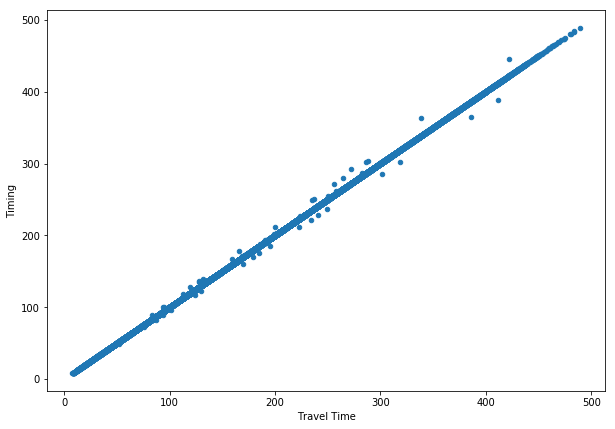

In [134]:
drone_data.plot.scatter(x="Travel Time",y="Timing",figsize=(10,7))

We can see that there a quite a few differences between Travel Time and the calculated Travel Time. We have to standardize these descrepencies in an accurate way.

In [135]:
drone_data[drone_data["Travel Time"].isnull()][["Travel Time","Timing"]].head()

,Travel Time,Timing
417,NaN,238.53
2123,NaN,214.21
2138,NaN,245.07
4162,NaN,212.26
4539,NaN,92.47


WE can see that we know the Travel Time for the nulls values in the Dataframe, We can impute the 40 unknown travel time with the Calculated Travel Time. We do that in the below section.

In [136]:
for i,row in drone_data[drone_data["Travel Time"].isnull()].iterrows():
    drone_data.loc[i,"Travel Time"] = row["Timing"]


In [137]:
drone_data["Travel Time"].isna().sum()

0

We can see that there are no more null values in the Travel Time.

Once we have all the Travel Times, we look for Drone Types that mislclassified. For this we consider the distance of each drone type respective speeds, constant value and given travel time for only those Drones whose difference in Timing is greater than a threshold. Since we observed that our drone speeds are 68.9,729,74.0, we can consider the threshold of difference less than a minute belonging to the correct drone type and that greater as incorrect Drone Type.

In [138]:
#count of those rows where the difference is greater than 1
count =0
for i,row in drone_data.iterrows():
        if (abs(row["Timing"] - row["Travel Time"]) > 1):
            #print(row["Drone Type"],row["Journey Distance"],row["Timing"],row["Travel Time"])
            count +=1  

count

49

We can see there are 49 such rows where the drone Types are misclassifed. We fix them with the below code.

In [139]:
#finding the ditances for each type of drone
parent_dict = dict()
for i,row in drone_data.iterrows():
    #if  row["Timing"] != float("nan"):
        if (abs(row["Timing"] - row["Travel Time"]) > 1):
            child_dict = dict()
            for k in drone_speed:
                child_dict[k] = abs(round(drone_speed[k][1] + (((row["Travel Time"] - 10)/60)*drone_speed[k][0]),3)-row["Journey Distance"])            
            parent_dict[i] = child_dict                

parent_dict

{750: {1: 0.007999999999981355, 2: 15.536000000000001, 3: 19.959000000000003},
 1861: {1: 18.709000000000003, 2: 0.0020000000000095497, 3: 5.213000000000022},
 2689: {1: 17.15900000000005, 2: 0.004000000000019099, 3: 4.821999999999946},
 2727: {1: 15.384000000000015, 2: 3.5080000000000098, 3: 0.003999999999990678},
 2737: {1: 7.015999999999991, 2: 0.001999999999995339, 3: 2.2890000000000015},
 2739: {1: 13.72999999999999, 2: 3.173000000000002, 3: 0.0010000000000047748},
 2800: {1: 0.006000000000000227, 2: 7.763000000000005, 3: 10.238},
 4802: {1: 0.0040000000000048885, 2: 6.281000000000006, 3: 8.38300000000001},
 6752: {1: 0.022999999999967713, 2: 26.906000000000063, 3: 34.18200000000007},
 6861: {1: 0.003999999999990678, 2: 5.319999999999993, 3: 7.179999999999993},
 6868: {1: 8.304999999999978, 2: 0.0010000000000047748, 3: 2.6110000000000184},
 8749: {1: 20.824000000000012, 2: 4.596000000000004, 3: 0.0020000000000095497},
 8886: {1: 21.426000000000045, 2: 4.718999999999994, 3: 0.00400

WE have a dictionary which have the closest differences in terms of difference with the key as the index of the misclassified index and the inner dictionary, having the distances with each of the Drone Types.

In [140]:
for k in parent_dict:
    for j in parent_dict[k]:
        if parent_dict[k][j] == min(parent_dict[k].values()):
            drone_data.loc[k,"Drone Type"] = j

The above code snippet replaces the misclassifed drone types with the correct drone type. We perform similar actions for Drone Type with null values also.

In [141]:
drone_data[drone_data["Drone Type"].isnull()][["Travel Time"]]

,Travel Time
16,218.58
4100,99.23
4108,74.95
6163,103.44
10258,95.60
12293,52.98
14350,270.20
30720,342.83
32774,139.66
33143,160.27


We know the travel time for all the null drone type values. We can use this info to perfrom further actions.

In [142]:
master_dict = dict()
for i,row in drone_data[drone_data["Drone Type"].isnull()].iterrows():
    child_dict = dict()
    for k in drone_speed:
        child_dict[k] =  abs(round(drone_speed[k][1] + (((row["Travel Time"] - 10)/60)*drone_speed[k][0]),3)-row["Journey Distance"])
    master_dict[i] = child_dict
master_dict

{16: {1: 18.137, 2: 4.052999999999997, 3: 0.0049999999999954525},
 4100: {1: 0.006000000000000227, 2: 6.117999999999995, 3: 8.180999999999997},
 4108: {1: 6.157999999999987, 2: 1.6529999999999916, 3: 0.004000000000019099},
 6163: {1: 6.393000000000001, 2: 0.012000000000000455, 3: 2.146000000000001},
 10258: {1: 0.0040000000000048885, 2: 5.878, 3: 7.8799999999999955},
 12293: {1: 0.0020000000000024443, 2: 3.041000000000004, 3: 4.332000000000008},
 14350: {1: 0.016000000000019554, 2: 17.512, 3: 22.432000000000016},
 30720: {1: 22.367999999999938,
  2: 0.0030000000000427463,
  3: 6.137000000000057},
 32774: {1: 8.820000000000022, 2: 0.0, 3: 2.738999999999976},
 33143: {1: 0.0049999999999954525,
  2: 10.189999999999998,
  3: 13.272999999999996}}

In [143]:
#imputing the missing drone type values with the correct dron etype value
for k in master_dict:
    for j in master_dict[k]:
        if master_dict[k][j] == min(master_dict[k].values()):
            drone_data.loc[k,"Drone Type"] = j

In [144]:
drone_data.loc[4100,"Drone Type"]

1.0

we can see that we have replcaed the null drone type values with the estimated drone Type values.

Now for the sake of standardization,we impute the Travel Time of the dataframe with the calculated Travel time for all those rows where the difference among the two times

In [145]:
#replcaing the calcualted time with the given time for all rows with difference less than a minute
for i,row in drone_data.iterrows():
    if abs(row["Timing"] - row["Travel Time"]) <= 1:
        drone_data.loc[i,"Travel Time"] = row["Timing"]

Now that we have imputed the Travel Time with calculated Travel Time, we can now check how many values match exactly with the given Travel Time.

In [146]:
count = 0
for i,row in drone_data.iterrows():
    if row["Timing"] == row["Travel Time"]:
        count+=1       
count

35677

We have around 35677 records having the same values. we have 49 Travel Time values where our calculated Travel Time was inconsistent and finally we around 10 null records for Timing column becuase of null Drone type values.

##### Visualization Post Correction.

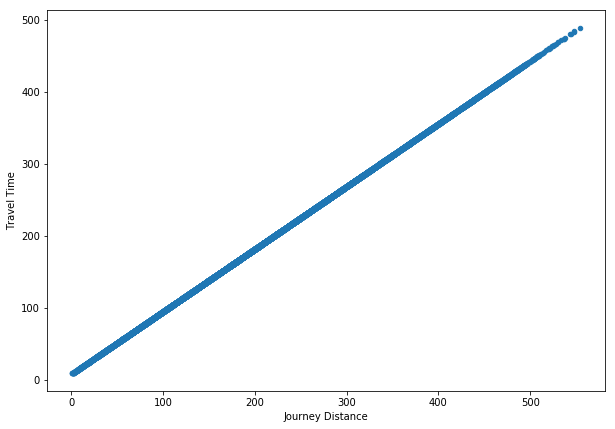

In [147]:
drone_data[drone_data["Drone Type"]==1].plot.scatter(x="Journey Distance",y="Travel Time",figsize=(10,7))

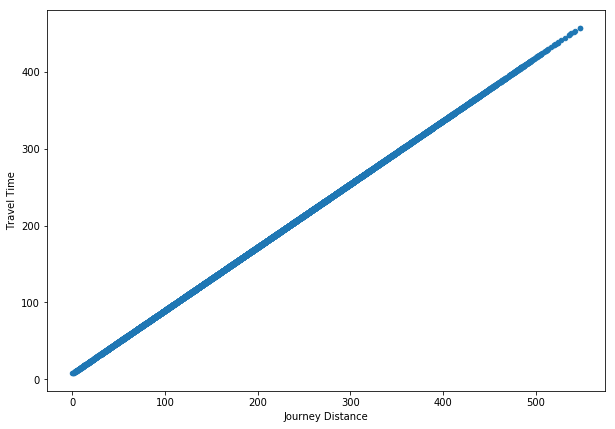

In [148]:
drone_data[drone_data["Drone Type"]==2].plot.scatter(x="Journey Distance",y="Travel Time",figsize=(10,7))

We can observe that for both Drone types which had inconsitency before Correction, now have corrected data.

#### 2.7 Departure Time v/s Travel Time v/s Delivery Time

Now that we have corrected Travel Time with great certainity, we can correct estbalish a relationship between Departure Time and Travel Time. We know that for our entire anlysis we have considered the Departure Time to be consistent and Correct. Theoretically we know that the summation of Departure Time and Travel Time will give us the correct Delivery Time. We make use of this concept to correct all the Delivery Time values with the Calculated Travel Time to maintain consistency.

In [149]:
#code to add the departure time and the Travel time to get Delivery time
time_list = []
for i,row in drone_data.iterrows():
    time_str = ""
    x = row["Departure Time"].split(":")
    s1 = timedelta(hours = int(x[0]),minutes =int(x[1]),seconds = int(x[2])).seconds
    s2 = timedelta(minutes = row["Travel Time"]).seconds
    m,s = divmod(s1+s2, 60)
    h, m = divmod(m, 60)
    if h >= 24:
        time_str += "%d:%02d:%02d" % (h-24,m,s)
    else:
        time_str += "%d:%02d:%02d" % (h,m,s)
    time_list.append(time_str)
    
drone_data["new_del_time"] = time_list

In [150]:
drone_data["new_del_time"].head()

0    16:38:43
1     0:06:56
2    11:16:51
3    14:36:55
4    22:16:42
Name: new_del_time, dtype: object

Let us now count the number of rows where the Calculated Delivery time is not equal to the Given Delivery time.

In [151]:
#count of rows where the calculated delviery time and given delivery time are unequal
count = 0
for i,row in drone_data.iterrows():
    if datetime.strptime(row["Delivery Time"],'%H:%M:%S') != datetime.strptime(row["new_del_time"],'%H:%M:%S'):
        count +=1     
count

12126

We can see that there are substantial number of rows that do not match with newly created Delivery time.However, we can replcae all the Delivery time values with the calculated time considering our Travel Time and Departure Time are certainly correct.

In [152]:
#replcaing all the delivery time values with calculated delivery time
for i,row in drone_data.iterrows():
    drone_data.loc[i,"Delivery Time"] = row["new_del_time"]

The above piece of code replaces all the Delivery Time values with the calculated Time.

In [153]:
drone_data.drop(["new_del_time","Timing"],axis="columns",inplace = True)
drone_data.shape

(35736, 16)

#### 2.8 Time period of Departure Time

The Problem description clearly states that the period of Departure Time is essenatil commodity that could potentially determine or ocntribute towards the target variable, which in our case in Delivery Fare. We therefore Create a Time Period Column that would hold the information about the time period of the Departure Time.

In [154]:
#code to crete a new column which would capture the time period of departure time
timing = []
count = 0
for i,row in drone_data.iterrows():
    d = row["Departure Time"].split(":")
    if (int(d[0]) >= 6 and int(d[0]) <= 11) and (int(d[1])>= 0 and int(d[1])<=59) and (int(d[2])>= 0 and int(d[2])<=59):
        timing.append("morning")
    elif (int(d[0]) >= 12 and int(d[0]) <= 20) and (int(d[1])>= 0 and int(d[1])<=59) and (int(d[2])>= 0 and int(d[2])<=59):
        timing.append("afternoon")
    else:
        timing.append("night")
        
drone_data["Timing"] = timing
drone_data["Timing"].head()

0    afternoon
1        night
2      morning
3      morning
4        night
Name: Timing, dtype: object

#### 2.9 Delivery Fare V/s Others

In this section we try to find the variables that correlate to the Target variable which metions that all the values are linearly dependent with some variables.

We now create a copy of dataframe to perform further operations.

In [155]:
#creating a copy of drone_data to perform further operations
test_drone_data = drone_data.copy()

We now do one hot encoding for the categorical variable that we recently added.

In [156]:
#performing one hot encoding on Timing column 
one_hot = pd.get_dummies(test_drone_data["Timing"])
test_drone_data = test_drone_data.join(one_hot)

Once the copy is created, we find the correlation matrix.

In [157]:
test_drone_data.corr()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare,afternoon,morning,night
Drone Type,1.000000,0.008091,0.015757,-0.011693,-0.011458,0.006254,-0.008151,-0.008691,0.002234,-0.003045,-0.062197,0.413202,0.006088,-0.015060,0.007421
Post Type,0.008091,1.000000,-0.002703,-0.005860,-0.005803,-0.003524,-0.006367,-0.002420,0.005829,-0.008736,-0.009258,0.229449,-0.000169,-0.006907,0.006369
Package Weight,0.015757,-0.002703,1.000000,-0.005375,-0.002155,0.001805,0.006069,-0.004642,0.005807,-0.002986,-0.004247,0.198006,0.004710,-0.004666,-0.000529
Origin Region,-0.011693,-0.005860,-0.005375,1.000000,-0.002327,-0.058165,-0.115236,0.000010,-0.006025,0.031682,0.032048,-0.000540,0.003142,-0.001324,-0.001958
Destination Region,-0.011458,-0.005803,-0.002155,-0.002327,1.000000,0.007413,0.000972,-0.065131,-0.110926,0.025966,0.026855,-0.005296,-0.005012,0.006487,-0.000803
Origin Latitude,0.006254,-0.003524,0.001805,-0.058165,0.007413,1.000000,-0.002340,0.001665,-0.003106,0.010590,0.010311,0.008664,-0.002221,0.003511,-0.000928
Origin Longitude,-0.008151,-0.006367,0.006069,-0.115236,0.000972,-0.002340,1.000000,0.000923,-0.000505,0.039352,0.040198,0.002169,0.005063,-0.008071,0.002174
Destination Latitude,-0.008691,-0.002420,-0.004642,0.000010,-0.065131,0.001665,0.000923,1.000000,0.006416,0.012728,0.013345,-0.003165,-0.009285,-0.007662,0.016177
Destination Longitude,0.002234,0.005829,0.005807,-0.006025,-0.110926,-0.003106,-0.000505,0.006416,1.000000,0.028885,0.028362,0.015916,0.003995,-0.005384,0.000832
Journey Distance,-0.003045,-0.008736,-0.002986,0.031682,0.025966,0.010590,0.039352,0.012728,0.028885,1.000000,0.997606,0.173910,-0.003208,0.006450,-0.002576


From the correlation matrix we find the following features that are highly related with the target variable are : 
<li>Drone Type</li>
<li>Package Weight</li>
<li>Post Type</li>
<li>Journey Distance</li>
<li>Travel Time </li>
<li>afternoon</li>
<li>morning</li>
<li>night</li>



Since we know that Journey Distance and Travel Time are interdependent, and the rule of thumb of Regression states that our dependent variables must be independent of each other to achieve good accuracy in predictions. Therefore, we choose either Journey Distance or Travel Time as part of our dependent variable for regression to predict Delivery fare values.

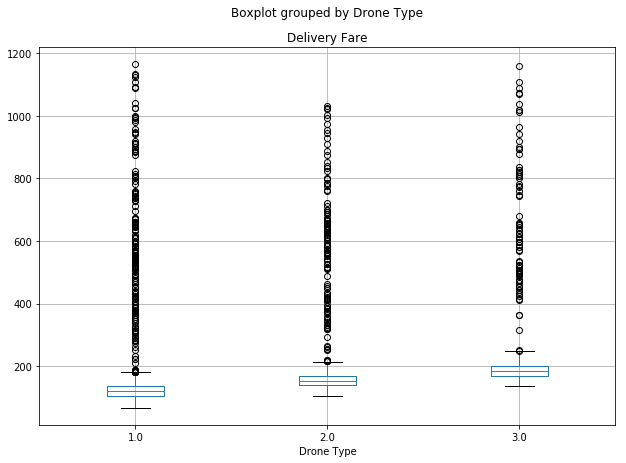

In [158]:
test_drone_data.boxplot("Delivery Fare",by="Drone Type",figsize=(10,7))

we can see that there are several outliers for each Drone Type. We can see that there is slight increase in Delivery fare with each Drone Type. However there are several Outliers, we handle them in susbsequent sections.

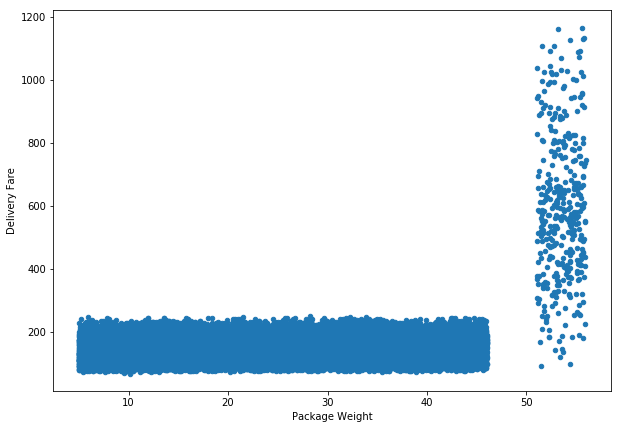

In [159]:
test_drone_data.plot.scatter(x="Package Weight",y="Delivery Fare",figsize=(10,7))

The above realtion between Package Weight and Delivery Fare looks rather absurd. The package Weight seems to be consistent with Delivery fare for weights until 47kgs. with packagae weights greater than 50, the Delviery Fare increases inexplicably. therefore, we cannot draw any other susbtantial insight from this. Perhaps these could be outliers ? we proceed further. 

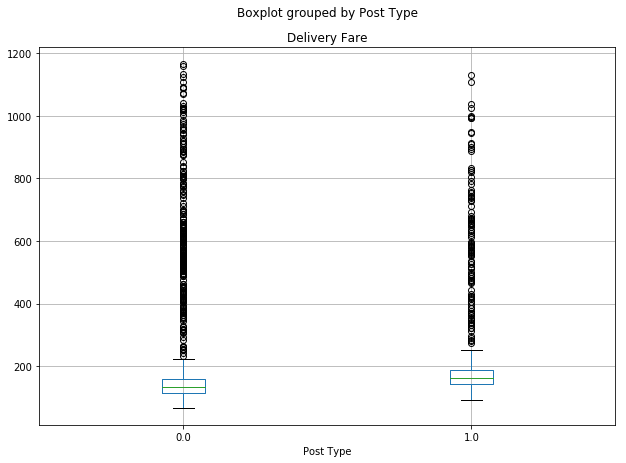

In [160]:
test_drone_data.boxplot("Delivery Fare",by="Post Type",figsize=(10,7))

In the above realtionship we can see that although there are several Delivery Fare lying outside the IQR, we can observe that the box plot for Post Type 1 is greater than that Post Type 2. Therefore there is a minute positive correlation.

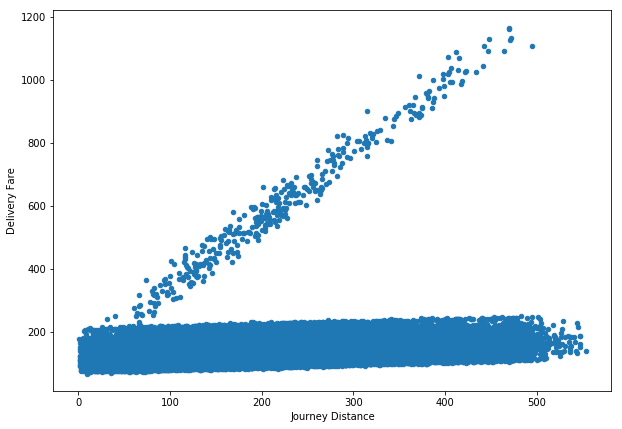

In [161]:
test_drone_data.plot.scatter(x="Journey Distance",y="Delivery Fare",figsize=(10,7))

From the above scatter plot between the Journey Distance and Delivery Fare. For most of the plots we see that ther data points tend to appear in a patch, whereas there are a few data points that appear to have a linear correlation. Perhaps these could be outliers? Maybe these data points have a package weight greater than certain threshold or some other variable.? Perhaps.!! LEt us Explore!!!!!.

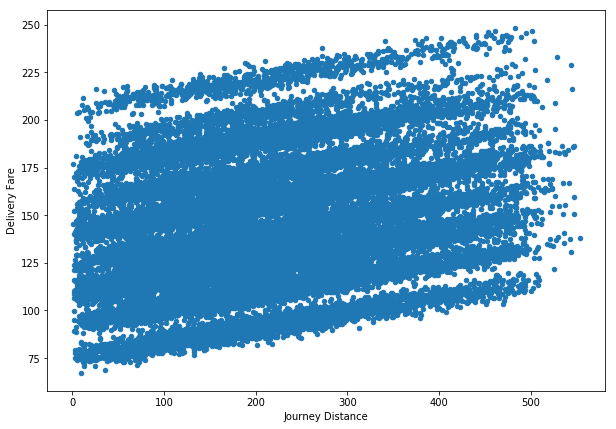

In [162]:
test_drone_data[test_drone_data["Package Weight"] < 50].plot.scatter(x="Journey Distance",y="Delivery Fare",figsize=(10,7))

Like we had anticipated, the package weight has a direct influence on the Jounrey Distance and the Delivery Fare. For package weights less than 50, the data points appear to be clustered within a region, for distances ranging from 0 to 500, but the Delivery fare confined from 0 to 250. However, is it the same for Package weights greater than 50 ? We visulaize that in the next graph.

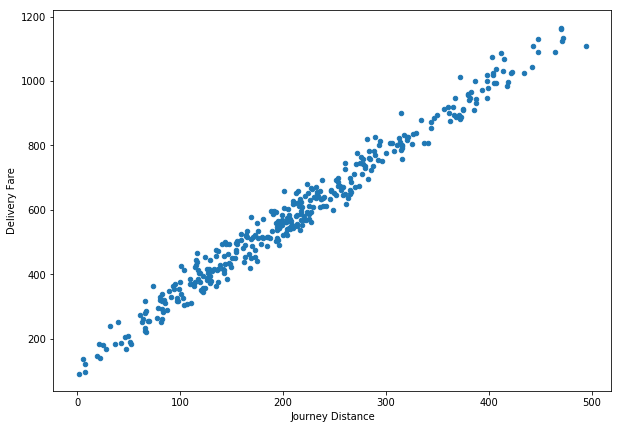

In [163]:
test_drone_data[test_drone_data["Package Weight"] > 50].plot.scatter(x="Journey Distance",y="Delivery Fare",figsize=(10,7))

Like we had anticipated, For package weights greater than 50, we can see that Delivery Fare is linearly increasing with journey distance. However, do these suggest any paricular pattern ? These might as well be considered outliers. However, we would not want to consider package weights greater than 50 as outliers as they are not unrelaistic values considering other package weights. They do not come across as something totally odd for the Package Weight population. Additoinally, this willad a bit of variace to our dataset, which is essential for a real world data. Having data that is totally devoid of variance looks good but doesnt tell anything interesting about other insights and patterns. WE perform similar actions with Travel Time as well.

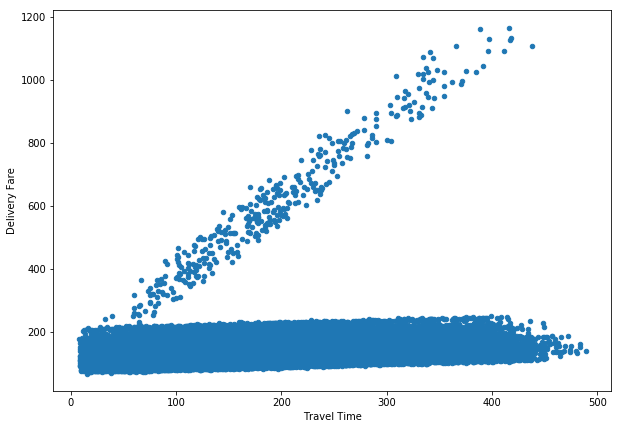

In [164]:
test_drone_data.plot.scatter(x="Travel Time",y="Delivery Fare",figsize=(10,7))

Similar to the Relationship between Distance and Delivery Fare, we see a similar relationship between Travel Time and Delivery Fare. We observe a path of points increasing unidirectionally for delivery Fare greater between 0 to 200. But what caused the delivery fare to increase linearly with Time for only a few data sources. This raises as suspicion of influence of some other feature which is making them do it. We can investigate Package weight as it looks like the only Feature that could affect the travel time and the deliery fare out of all of them.

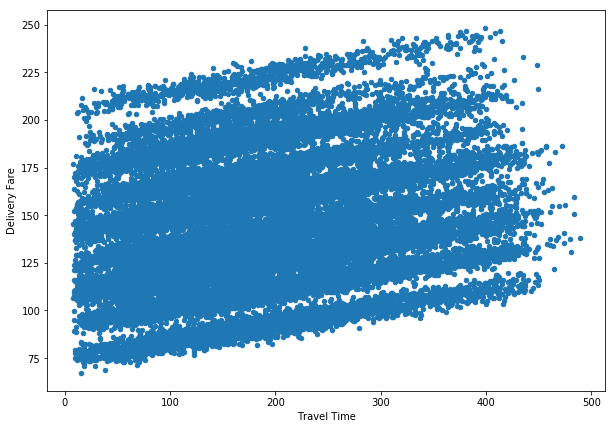

In [165]:
test_drone_data[test_drone_data["Package Weight"] < 50].plot.scatter(x="Travel Time",y="Delivery Fare",figsize=(10,7))

We can see that for package weights less than 50, we get the plot as above. This plot is the patch of data points beneath the linear curve. This indicates that Package weight influences the Delivery Fare and TRavel Time when the package weight is greater than a threshold. In our case, ther threshold is 50kg.

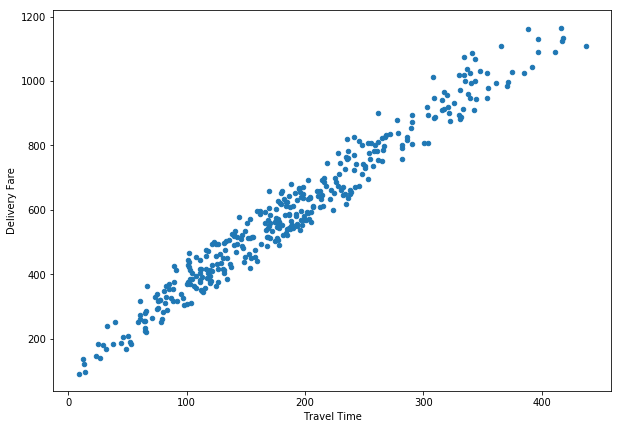

In [166]:
test_drone_data[test_drone_data["Package Weight"] > 50].plot.scatter(x="Travel Time",y="Delivery Fare",figsize=(10,7))

Confirming our hypothesis, We can see the relationship for Packages with weight more than 50 kg, the Delivery Fare increases linearly with time. The same pattern can be observed with respect to distance as well.

Now that we have identified all the dependent variables for our Target, Delivery Fare, We fit a Linear Regression Model to predict the missing values for the Delivery Fare.

In order to carry out Linear Regression, we need to do the following steps:
<li>From the Correlation Matrix we found out that Drone Type has the highest Correlation. In accordance to that, we have to eliminate outliers based on Drone Type for Delivery Fare.</li>
<li>Once the outliers are removed from the subset for each Drone Type, we have to divide our dataset into 2 parts
    Training Data Set with all known Delivery Fare ValuesTesting Data Set with all unknown Delivery Fare Values</li>
<li>Thirdly we split the  Training Dataset into Test and Train, fit our model over these two sets which are divided into 70:30 ratio respectively. WE then perform some statistical analysis to check the accuracy of prediction.</li>
<li>Once the accuracy has reached a satisfactorily level we can run the linear regression again on the Train and Test Dataset</li>

We perform all the necessary steps in the following sections

In [167]:
print("Minimum fare for drone type 1",drone_data[drone_data["Drone Type"] == 1]["Delivery Fare"].min())
print("Maximum fare for drone type 1",drone_data[drone_data["Drone Type"] == 1]["Delivery Fare"].max())
print("Minimum fare for drone type 2",drone_data[drone_data["Drone Type"] == 2]["Delivery Fare"].min())
print("Maximum fare for drone type 2",drone_data[drone_data["Drone Type"] == 2]["Delivery Fare"].max())
print("Minimum fare for drone type 3",drone_data[drone_data["Drone Type"] == 3]["Delivery Fare"].min())
print("Maximum fare for drone type 3",drone_data[drone_data["Drone Type"] == 3]["Delivery Fare"].max())


Minimum fare for drone type 1 66.95
Maximum fare for drone type 1 1166.17
Minimum fare for drone type 2 102.72
Maximum fare for drone type 2 1032.52
Minimum fare for drone type 3 135.56
Maximum fare for drone type 3 1160.38


From the maximum and min values for delivery fare, we can see a drastic difference between the values. therefore we can predict that there are fair amount of outliers in each region, which need to be taken out in order for our data to be consistent and the prediction to be accurate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002714402E4E0>]],
      dtype=object)

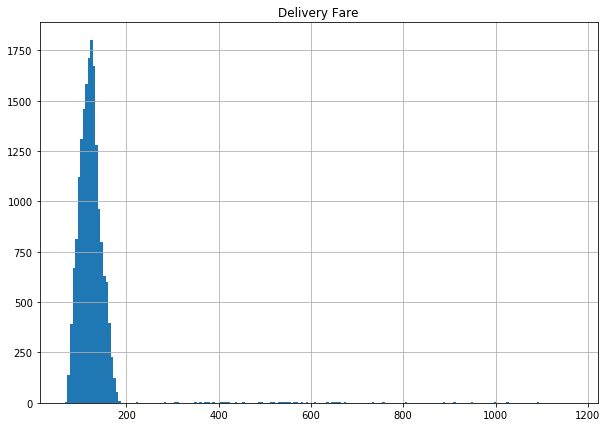

In [168]:
drone_data[drone_data["Drone Type"] == 1].hist("Delivery Fare",bins = 200,figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027141E8E550>]],
      dtype=object)

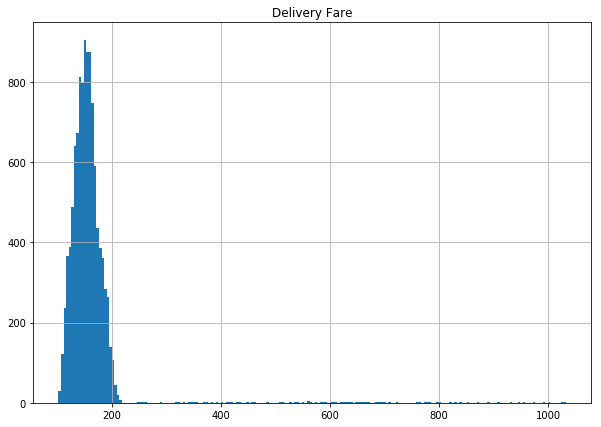

In [169]:
drone_data[drone_data["Drone Type"] == 2].hist("Delivery Fare",bins = 200,figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002713A779390>]],
      dtype=object)

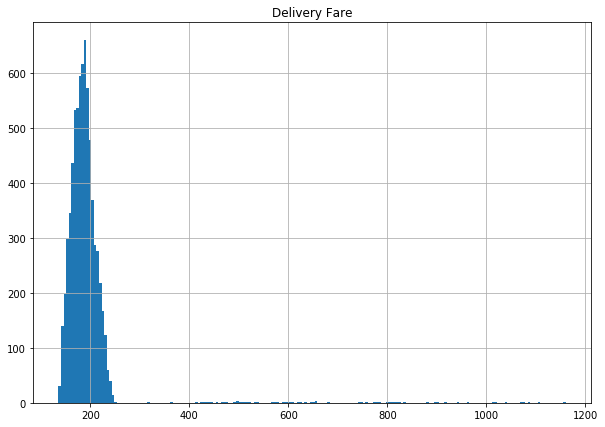

In [170]:
drone_data[drone_data["Drone Type"] == 3].hist("Delivery Fare",bins = 200,figsize=(10,7))

For each region, we see fair amount of outliers towards the right tail of the distribution. WE therefore have to identify these outliers by considering the mean of each drone type as the central tendency for each drone type and and calculate the delivery fare that are 3 standard deviations away from the mean and drop these outliers from the dataset.


In the following sections we get rid of the outliers, by dropping them and gettin the count of the number of outliers for each drone type.

In [171]:
#finding outlier delivery fare for each drone type and removing them
mean_del_fare1 = test_drone_data[test_drone_data["Drone Type"] == 1]["Delivery Fare"].mean()
std_del_fare1 = test_drone_data[test_drone_data["Drone Type"] == 1]["Delivery Fare"].std()
count = 0
for i,row in test_drone_data[test_drone_data["Drone Type"] == 1].iterrows():
    if (row["Delivery Fare"] < mean_del_fare1 - (3*std_del_fare1)) or (row["Delivery Fare"] > mean_del_fare1  + (3*std_del_fare1)):
        test_drone_data = test_drone_data.drop([i])
        count +=1
count

160

In [172]:
mean_del_fare2 = test_drone_data[test_drone_data["Drone Type"] == 2]["Delivery Fare"].mean()
std_del_fare2 = test_drone_data[test_drone_data["Drone Type"] == 2]["Delivery Fare"].std()
count = 0
for i,row in test_drone_data[test_drone_data["Drone Type"] == 2].iterrows():
    if (row["Delivery Fare"] < mean_del_fare2 - (3*std_del_fare2)) or (row["Delivery Fare"] > mean_del_fare2  + (3*std_del_fare2)):
        test_drone_data = test_drone_data.drop([i])
        count += 1
count

105

In [173]:
mean_del_fare3 = test_drone_data[test_drone_data["Drone Type"] == 3]["Delivery Fare"].mean()
std_del_fare3 = test_drone_data[test_drone_data["Drone Type"] == 3]["Delivery Fare"].std()
count = 0
for i,row in test_drone_data[test_drone_data["Drone Type"] == 3].iterrows():
    if (row["Delivery Fare"] < mean_del_fare3 - (3*std_del_fare3)) or (row["Delivery Fare"] > mean_del_fare3  + (3*std_del_fare3)):
        test_drone_data = test_drone_data.drop([i])
        count += 1
count

76

In the above section we found out and dropped 160,105,76 outliers for drone Type1,2 and 3 respectively.

In [174]:
test_drone_data.shape

(35395, 20)

the shape of the dataset after outlier removal looks as shwon above.

Now that we have removed outliers, we remove duplicates from the dataset.

In [175]:
test_drone_data.drop_duplicates(keep='first',inplace = True)

In [176]:
test_drone_data.shape

(35359, 20)

We can observe that we have dropped substantial amount of rows in the dataset.

In [177]:
test_drone_data["Id"].isna().sum()

24

However we can observe that are still 24 null Id values present, which were'nt removed.

Also, knowing that there are aroudn 24 null id values, we can anticipate that if they were to be duplicate of some row which has the Id, we can easily say that for the null value to be duplicate, we have to ensure that other than Id column, all other column values are the same for both the rows. Therefore, we create a subset without Id column and find if there are duplicates. we perform that in the below section.

In [178]:
#creating a list of all columns other than Id
column = []
for k in test_drone_data.keys():
    if k != "Id":
        column.append(k)

In [179]:
test_drone_data[test_drone_data.duplicated(subset = column,keep=False)].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Timing,afternoon,morning,night
1448,ID5839021793,1.0,1.0,28.423,17.0,44.0,-36.640819,147.694547,-36.659761,143.990220,330.816,2018-07-07,09:30:59,295.14,14:26:07,131.35,morning,0,1,0
2060,ID1970145779,1.0,0.0,7.951,49.0,19.0,-36.786287,145.208311,-36.831670,146.739138,136.526,2018-01-04,08:20:10,126.18,10:26:20,87.79,morning,0,1,0
2548,ID1744538544,3.0,0.0,44.820,18.0,17.0,-38.816071,142.856809,-36.513914,147.532528,485.111,2018-06-13,16:23:34,400.36,23:03:55,193.50,afternoon,1,0,0
3615,ID1117997027,1.0,0.0,23.074,49.0,28.0,-36.830988,145.310538,-38.819388,148.449993,353.787,2018-02-19,00:27:02,315.12,5:42:09,142.08,night,0,0,1
7008,ID1392872319,1.0,0.0,17.381,57.0,52.0,-38.978420,146.402061,-36.507852,143.607274,368.952,2018-05-12,09:41:27,328.31,15:09:45,104.32,morning,0,1,0


the above dataframe gives all the rows which have Duplicated values for all columns without looking at Id value.

In [180]:
#capture all the duplicated rows in a datframe
dup = test_drone_data[test_drone_data.duplicated(subset = column,keep=False)]

#dataframe that has all id's as null
empty = test_drone_data[test_drone_data["Id"].isnull()]

#Finding the set operation to find if the null id columns are duplicated or not.
dup_idx = list(set(list(empty.index.values)) - set(list(dup.index.values)))

dup_idx



[]

We can see that the set difference came out to be null indicating that all the indices of null rows are included in the dup dataframe. Therefore we can go ahead drop these rows from the dataset.

Now that we got a bunch of indices which have duplicates with known index columns, we get a set difference, between the set of indices of null id dataframe and the known id dataframe. The set difference comes out to be 0. indicatin that all the null Id rows are duplicates. We can go ahead and drop them from our dataset.

In [181]:
test_drone_data.drop_duplicates(subset = column,keep='first',inplace = True)

In [182]:
test_drone_data["Id"].isna().sum()
    

0

We can see that we have dropped all the rows which were duplicates for all the columns. they turned out to be all the rows with Id's were null.

##### 2.9.1 Fitting Linear Regression Model

Now that we have performed all the necessary operations, we can now jump into fitting a linear regression model on the modified dataset which is devoid of outliers.

In [183]:
Master_Test = test_drone_data[test_drone_data["Delivery Fare"].isnull()]
sub_master = pd.DataFrame(Master_Test, columns=["Drone Type","Package Weight","Journey Distance","Post Type","morning","afternoon","night"])

In the above code, we have created Master_test Dataframe that has rows which have Delivery Fare as null. These is basically the dataset which we will be predicting values on. 

The sub_master is another dataframe which is subset of Master_Test which has target dependent columns only. this will be used to calculate the Delivery Fare.

In [184]:
sub_master.shape

(30, 7)

we see that there are only 30 rows of unknown Delivery Fare values.

In [185]:
Train  = test_drone_data[test_drone_data["Delivery Fare"].notnull()]
Train_sub = pd.DataFrame(Train, columns=["Drone Type","Package Weight","Journey Distance","Post Type","morning","afternoon","night"])
Train_targ = Train["Delivery Fare"]

We have now formed a Train datset where there are no null values in the Delivery Fare column. Train_sub contains a subset of all dependent target variables. We have also created a Train_targ as a target column.

In [186]:
Train_sub.head()

,Drone Type,Package Weight,Journey Distance,Post Type,morning,afternoon,night
0,1.0,9.646,127.689,0.0,0,1,0
1,3.0,38.017,108.799,0.0,0,0,1
2,1.0,29.277,46.251,1.0,1,0,0
3,1.0,32.770,367.692,0.0,1,0,0
4,1.0,13.591,23.268,0.0,0,0,1


In [187]:
y = Train["Delivery Fare"]
X_train, X_test, y_train, y_test = train_test_split(Train_sub, y, test_size=0.3)
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In the above piece of code, we have split the train data into X_train,X_test,y_train,y_test sections. this split is converted into two datasets of 70 and 30 percent ratio respectively. the model is trained 70% of the data and the we use the same model to predict values values in the 30% of the dataset.

In [188]:
predictions = lm.predict(X_test)

In [189]:
sam = pd.DataFrame()
sam["Given Value"] = y_test
sam["Predicted Value"] = predictions
sam.head(30)

,Given Value,Predicted Value
29555,153.58,147.932772
4391,173.41,171.377650
13817,99.80,97.825833
27087,187.01,189.821136
20771,228.34,221.457258
32239,144.51,144.909301
14968,141.30,139.782952
18049,163.48,163.540954
1981,99.21,100.558275
30307,119.26,118.337122


Just to compare the predicted value with the predicted value, we put to dataframe to check the range of that are predicted and the actual range of values for given value.

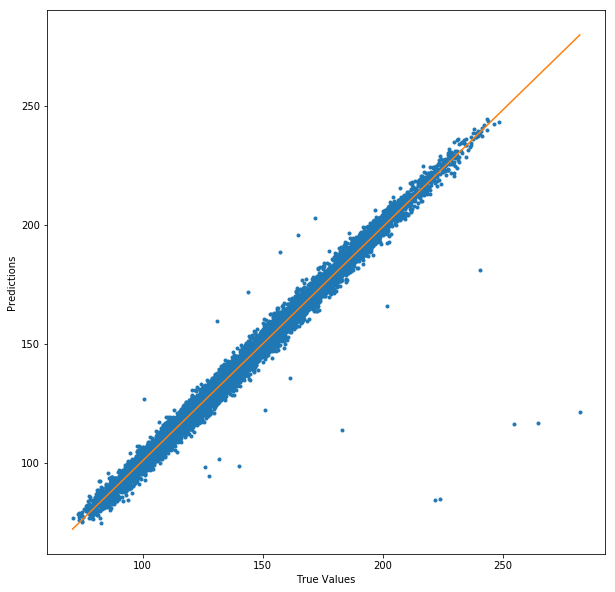

In [190]:
plt.figure(figsize=(10,10))
plt.plot(y_test, predictions,'.')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,predictions,1))(np.unique(y_test)))
plt.show()

From the above scatter plot and the regression line, we can see that there is a high convergence of the predicted Values and the True Values. Around less than 3% of the data point do not fit to the regression line. The fact that there is a high convergence , indicates that the predicted values have a high probablity of being correct.

In [191]:
model.score(X_test, y_test)*100

98.10814664819895

We can see that the accuracy of the prediction of linear regression model is close to 98%. This is a good indication that our predicted values are more likely to be correct. We therefore, now perform the same regression and impute the null values with the predicted Delivery Fare values.

In [192]:
model = lm.fit(Train_sub, Train_targ)
sub_master["Predicted Fare"] = lm.predict(sub_master)
sub_master.head()

,Drone Type,Package Weight,Journey Distance,Post Type,morning,afternoon,night,Predicted Fare
184,2.0,13.407,304.466,0.0,0,1,0,147.994857
2419,1.0,38.599,161.470,0.0,0,1,0,107.867712
4282,1.0,38.095,152.318,1.0,0,0,1,155.198893
6295,2.0,14.178,231.848,0.0,0,1,0,142.463417
6331,1.0,28.606,112.690,0.0,0,1,0,103.050226


WE have now performed prediction of Delivery Fare Values for unkown Delivery Fare Values. The column Predicted Fare represents the corresponding Predicted Fare for the unknown Delivery Fare value for respective index.

Now that we have predicted and performed linear regression, we can now impute these values at the corresponding index in the parent dataframe.

In [193]:
for i,row in sub_master.iterrows():
    test_drone_data.loc[i,"Delivery Fare"] = round(row["Predicted Fare"],2)

We have now imputed the null Delivery Fare values with predicted values at respective indices. 

##### 2.9.2 Visulaization of Before and After Regression

<b><i>Before Regression</i></b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027143B22240>]],
      dtype=object)

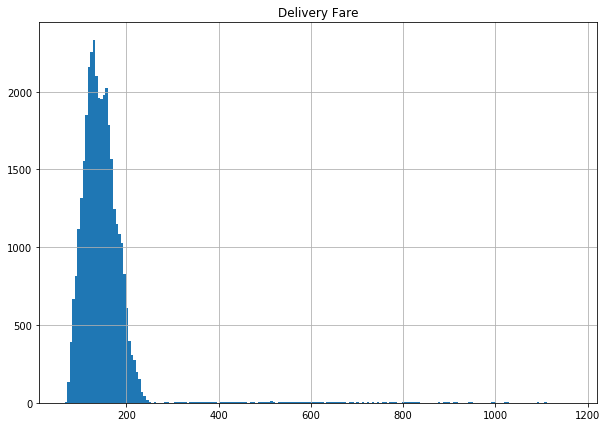

In [194]:
drone_data.hist("Delivery Fare",bins = 200,figsize=(10,7))

<b><i>After Regression</i></b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027148283908>]],
      dtype=object)

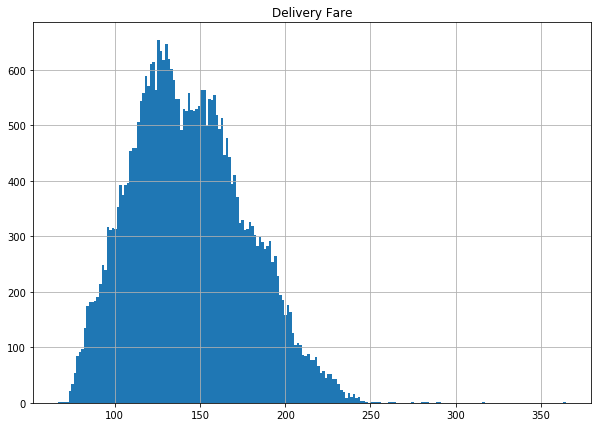

In [195]:
test_drone_data.hist("Delivery Fare",bins=200,figsize=(10,7))

From the above 2 plots we can see that Before Regression the distribution of Delivery Fare was concentrated within a small cluster with a lot of outliers. After Regression, we observe that the distribution is tending more towards normal distribution and that the distribution has very minimal/negligible outliers. This can be a step to indicate that our regression has worked well without predicting unreliasitc values.

### 3. Performing Final Format processing

In [196]:
test_drone_data.dtypes

Id                        object
Drone Type               float64
Post Type                float64
Package Weight           float64
Origin Region            float64
Destination Region       float64
Origin Latitude          float64
Origin Longitude         float64
Destination Latitude     float64
Destination Longitude    float64
Journey Distance         float64
Departure Date            object
Departure Time            object
Travel Time              float64
Delivery Time             object
Delivery Fare            float64
Timing                    object
afternoon                  uint8
morning                    uint8
night                      uint8
dtype: object

Let us examine the number of columns that still have null values in them.

In [197]:
test_drone_data.columns[test_drone_data.isnull().any()]

Index([], dtype='object')

We see that there are no null values in any of the columns in the Dataframe.

Our current Dataframe has 4 extra columns than the actual Dataframe. WE therefore drop these columns. These columns were createed to hold intermediate results.

In [198]:
test_drone_data.drop(["Timing","afternoon","morning","night"],axis="columns",inplace = True)

In [199]:
test_drone_data.shape

(35335, 16)

After dropping the extra columns the shape of the processed dataframe conforms to that of the original Dataframe.

Now we have to convert the Departure Date back to the original format of Object type. We do that in the succeeding section.

In [200]:
test_drone_data.dtypes

Id                        object
Drone Type               float64
Post Type                float64
Package Weight           float64
Origin Region            float64
Destination Region       float64
Origin Latitude          float64
Origin Longitude         float64
Destination Latitude     float64
Destination Longitude    float64
Journey Distance         float64
Departure Date            object
Departure Time            object
Travel Time              float64
Delivery Time             object
Delivery Fare            float64
dtype: object

In [201]:
test_drone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35335 entries, 0 to 35675
Data columns (total 16 columns):
Id                       35335 non-null object
Drone Type               35335 non-null float64
Post Type                35335 non-null float64
Package Weight           35335 non-null float64
Origin Region            35335 non-null float64
Destination Region       35335 non-null float64
Origin Latitude          35335 non-null float64
Origin Longitude         35335 non-null float64
Destination Latitude     35335 non-null float64
Destination Longitude    35335 non-null float64
Journey Distance         35335 non-null float64
Departure Date           35335 non-null object
Departure Time           35335 non-null object
Travel Time              35335 non-null float64
Delivery Time            35335 non-null object
Delivery Fare            35335 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.8+ MB


In [202]:
#writing the file to a new csv file.
test_drone_data.to_csv("29270863_solution.csv",index=False)

### 4.Conclusion

In conclusion, we can say that we have performed all the prescribed analysis and Exploratoration of the data to find anamolies in terms of Syntatic, semantic and coverage errors. Here is the summary of how we conducted our Exploration :
<li>We started by importing all the necessary libraries and dependencies for our exploration.</li>
<li>We Performed Preliminary anlaysis by feature basis by finding the datatype, the number of nulls contained, the overall distribution of data in the feature and finding summary of statistcal measures.</li>
<li>we then jumped into bi-variate analysis and found out relationships among feature and based on those relatinships we fixed values of incorrect features. For example : we fixed incorrect latitude and Longitude based on Regions, We corrected post type based on Id, we corrected Journey Distance from our corrected Latitue and Longitude values, WE further corrected the Travel time by first finding out the speed of each drone and the constant take off and landing distances, futhermore, we corrected the misclassified drone types based on travel time speed and distances. WE showed the visulizations before and after the corrections.</li>
<li>Once we corected everything, we dropped the duplicated rows from the dataset.</li>
<li>We found out all the relations between the target variable and the dependent variables and plotted the relationships. we further fit a linear regression model to predict the missing values in the Delivery Fare. </li>
<li>Lastly, we write the cleaned data to a csv file. the file will be devoid of null values and outliers in every feature.</li>

### 5. References

<li> http://scikit-learn.org/stable/ </li>
<li>https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9</li>
<li>https://www.programiz.com/python-programming/methods/built-in/divmod</li>
<li>https://docs.scipy.org/doc/numpy-1.15.1/reference/</li>
<li>https://pandas.pydata.org/pandas-docs/stable/</li>